<a name = "inicio"></a>

***

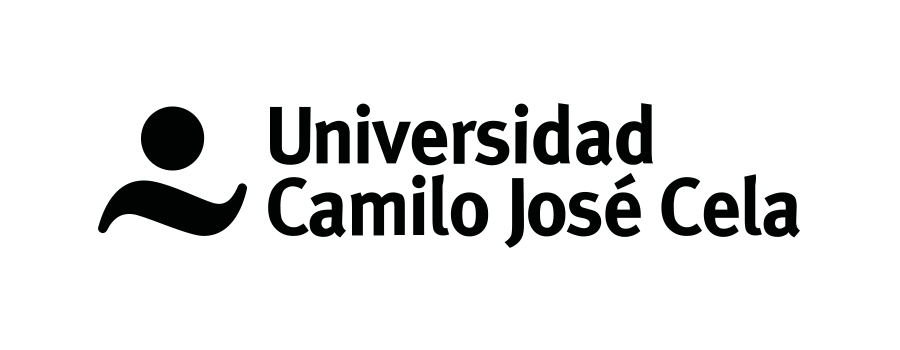

***

**Nombre y apellidos**: Sergio Rodríguez Muértegui

***

# Instrucciones de la prueba <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Este notebook corresponde a la **segunda prueba de evaluación continua**. El peso de la misma corresponde al **20% de la nota final** de la asignatura. Se establecen los siguientes tres niveles de evaluación por bloques de dificultad: 

1. Básico: el alumno es capaz de realizar tareas, ejercicios o prácticas similares a las realizadas durante la asignatura.
2. Intermedio: el alumno es capaz de aplicar las técnicas, conocimientos y habilidades vistas en clase a problemas con elementos diferentes.
3. Avanzado: el alumno es capaz de ampliar las técnicas, conocimientos y habilidades vistas en clase, investigando nuevos aspectos o problemas.

Las calificaciones, por tanto, serán coherentes al nivel alcanzado. Cada alumno deberá de entregar este mismo notebook con sus respuestas a través de la plataforma **Blackboard** llamando al archivo **PEC2_Apellidos**. El profesor publicará las calificaciones con posterioridad. ¡Mucha suerte y ánimo a tod@s!
    
**<mark>IMPORTANTE.-**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que deberéis de aportar respuestas detalladas y bien justificadas. No es admisible adjuntar únicamente el código sin comentar. Hay que incluir paso a paso lo que estáis haciendo en las propias celdas de código. Además, deberéis de razonar, argumentar e INTERPRETAR los resultados obtenidos con vuestras propias palabras según el contexto de cada ejercicio utilizando para ello celdas tipo Markdown. </b></div>

# Bloque 1: Ejercicios básicos de la prueba <a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### 01 Ejercicio

Un analista de deportes quiere saber si existe una relación entre la variable número de bateos que realiza un equipo de béisbol (`numero_bateos`) y la variable dependiente, número de runs que consigue, (`runs`). Para ello contáis con la base de datos $\tt beisbol$ que se aporta debajo sobre diferentes equipos de la Major League Baseball (MLB) de los EE.UU. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

In [12]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago", "Cincinnati", "Los_P.", "Philadelphia", "Chicago", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [13]:
#Una vez se han cargado los datos en el DataFrame 'beisbol' se comienza la exploración inicial de la base de datos
print('Las primeras filas de la base de datos son:')
head(beisbol) #Mostramos las primeras filas del dataframe

[1] "Las primeras filas de la base de datos son:"


equipos,numero_bateos,runs
Texas,5659,855
Boston,5710,875
Detroit,5563,787
Kansas,5672,730
St.,5532,762
New_S.,5600,718


In [14]:
print('Las últimas filas de la base de datos son:')
tail(beisbol) #Mostramos las ultimas filas del dataframe

[1] "Las últimas filas de la base de datos son:"


,equipos,numero_bateos,runs
25,Tampa,5436,707
26,Atlanta,5528,641
27,Washington,5441,624
28,San.F,5486,570
29,San.I,5417,593
30,Seattle,5421,556


In [15]:
print('Las variables y el tipo de datos que representan son:')
str(beisbol) #Mostramos un resumen de las variables y los tipos de datos

[1] "Las variables y el tipo de datos que representan son:"
'data.frame':	30 obs. of  3 variables:
 $ equipos      : Factor w/ 29 levels "Arizona","Atlanta",..: 27 4 9 12 25 17 18 15 8 11 ...
 $ numero_bateos: num  5659 5710 5563 5672 5532 ...
 $ runs         : num  855 875 787 730 762 718 867 721 735 615 ...


In [16]:
#Mostramos la dimensión de la base de datos
print(paste('Esta base de datos consta de', dim(beisbol)[1], 'filas y', dim(beisbol)[2], 'columnas.' ))

[1] "Esta base de datos consta de 30 filas y 3 columnas."


In [17]:
print('Las variables de la base de datos son:')
names(beisbol) #Mostramos los nombres de las variables exclusivamente

[1] "Las variables de la base de datos son:"


[1] "equipos"       "numero_bateos" "runs"

In [18]:
any(is.na(beisbol)) #Buscamos si falta algún dato en la base de datos

[1] FALSE

**Interpretación de los resultados.-** Se posee un marco de datos o dataframe denominado *`beisbol`* el cual posee **3 variables** (`equipos`, `numero_bateos` y `runs`). El dataframe contiene **30 observaciones** (filas) que representan 30 equipos de la Major League Baseball (MLB). Existen **3 variables** (columnas) que aportan la siguiente información: los nombres de cada uno de los equipos, la cantidad de bateos que realiza el equipo y las carreras que logran con los bateos realizados. Analizando más en profundidad se observa que `equipos` es una variable categórica al contener los nombres de cada uno de los equipos, que son valores únicos. Sin embargo, las otras 2 variables almacenan datos númericos. Para finalizar, tal y como se observa, no existen datos faltantes o nulos.

In [19]:
resbeisbol=summary(beisbol); resbeisbol #Con la función summary() observamos un resumen general de las variables

       equipos   numero_bateos       runs      
 Chicago   : 2   Min.   :5417   Min.   :556.0  
 Arizona   : 1   1st Qu.:5448   1st Qu.:629.0  
 Atlanta   : 1   Median :5516   Median :705.5  
 Baltimore : 1   Mean   :5524   Mean   :693.6  
 Boston    : 1   3rd Qu.:5575   3rd Qu.:734.0  
 Cincinnati: 1   Max.   :5710   Max.   :875.0  
 (Other)   :23                                 

**Interpretación de los resultados.-** Ente varios datos, la observación más importante sería que en la variable `equipos`, *Chicago* posee dos valores, lo cual no debería ser posible porque deberían ser únicos sus valores. Debido a esto vamos a analizar los datos referentes a *Chicago* ya que es el único equipo representado dos veces.

In [20]:
beisbol[beisbol$equipos=='Chicago',] #Mostramos las filas con los nombnres Chicago

,equipos,numero_bateos,runs
13,Chicago,5549,654
17,Chicago,5502,654


**Interpretación de los resultados.-** Como se observa en la tabla immediatamente superior, efectivamente hay dos equipos denominados como *Chicago*. Sin embargo, a pesar de compartir el mismo número de carreras (**654**), no tienen el mismo número de bateos. Esto marca varias posibilidades:
+ Se han obtenido o transmitido los datos erróneamente.
+ Se ha producido alguna clase de engaño para mostrar mejores cifras.
+ Existen varios equipos en la ciudad de Chicago y la forma de catalogarlos no es totalmente adecuada.

Una búsqueda rápida en internet nos confirma que efectivamente existen dos equipos de Chicago en la MLB, los Cubs y los White Socks. Debido a esto, lo ideal sería separarlos en dos distintos equipos, si no tomará que un único equipo aporta dos datos y ello podría conllevar a errores en el tratamiento de los propios datos (aunque al ser una variable categórica, a la hora de representarlos se tomaría como dos Chicagos distintos. Pero esto también traería confusión cuando se analicen los resultados por la dificultadad de averiguar cual es cada uno).

In [21]:
beisbol$equipos = as.character(beisbol$equipos) #Como es una variable factor y no nos permite alterarla, la pasamos a character

beisbol[beisbol$equipos=='Chicago', 'equipos'] = c('ChicagoA', 'ChicagoB') #Cambiamos los nombres

beisbol$equipos = as.factor(beisbol$equipos) #Volvemos a dejarla como factor

In [22]:
beisbol[c(13,17),] #Mostramos las filas para comprobar el cambio

,equipos,numero_bateos,runs
13,ChicagoA,5549,654
17,ChicagoB,5502,654


A pesar de conocer los nombres de los dos equipos, se ha tomado la decisión de usar los nombres A y B porque no tenemos forma de averiguar qué datos representa a qué equipo y a riesgo de cometer un error los analizaresmos neutramente. Una vez realizado el ajuste, continuamos con el análisis. A continuación, realizaremos dos tablas de frecuencias (absolutas y relativas) de la varible `equipos`, ya que es la variable categórica.

In [23]:
abs= table(beisbol$equipos); abs #Realizamos una tabla de frecuencias absolutas


     Arizona      Atlanta    Baltimore       Boston     ChicagoA     ChicagoB 
           1            1            1            1            1            1 
  Cincinnati    Cleveland     Colorado      Detroit      Florida      Houston 
           1            1            1            1            1            1 
      Kansas      Los_An.       Los_P.    Milwaukee    Minnesota       New_S. 
           1            1            1            1            1            1 
      New_Y.      Oakland Philadelphia   Pittsburgh        San.F        San.I 
           1            1            1            1            1            1 
     Seattle          St.        Tampa        Texas      Toronto   Washington 
           1            1            1            1            1            1 

In [24]:
rela = prop.table(abs); rela #Realizamos la taabla de frecuencias relativas


     Arizona      Atlanta    Baltimore       Boston     ChicagoA     ChicagoB 
  0.03333333   0.03333333   0.03333333   0.03333333   0.03333333   0.03333333 
  Cincinnati    Cleveland     Colorado      Detroit      Florida      Houston 
  0.03333333   0.03333333   0.03333333   0.03333333   0.03333333   0.03333333 
      Kansas      Los_An.       Los_P.    Milwaukee    Minnesota       New_S. 
  0.03333333   0.03333333   0.03333333   0.03333333   0.03333333   0.03333333 
      New_Y.      Oakland Philadelphia   Pittsburgh        San.F        San.I 
  0.03333333   0.03333333   0.03333333   0.03333333   0.03333333   0.03333333 
     Seattle          St.        Tampa        Texas      Toronto   Washington 
  0.03333333   0.03333333   0.03333333   0.03333333   0.03333333   0.03333333 

**Interpretación de los resultados.-** En la tabla de frecuencias absolutas, observamos que efectivamente cada equipo esta representado de forma única. En caso de no haber cambiado los nombres de Chicago, aparecería representado en esta tabla con un dos, implicando que que son dos datos de un mismo equipo. Luego, tenemos la tabla de frecuencias relativas que nos informa de cuanta representación hay de cada equipo a nivel porcentual. Al haber, 30 equipos distintos, cada uno de estos equipos se ve representado por el mismo porcentaje (0.0333 o 3.33%).

Ahora, realizaremos un análisis visual de ls variables `numero_bateos` y `runs`. Primero realizaremos unos histogramas para poder detectar patrones en los datos y luego por medio de digramas de cajas (boxplot) analizaremos la posibilidad de valores atípicos. Además, también son interesante medidas claves de estas variables como la varianza o la media, entre otros.

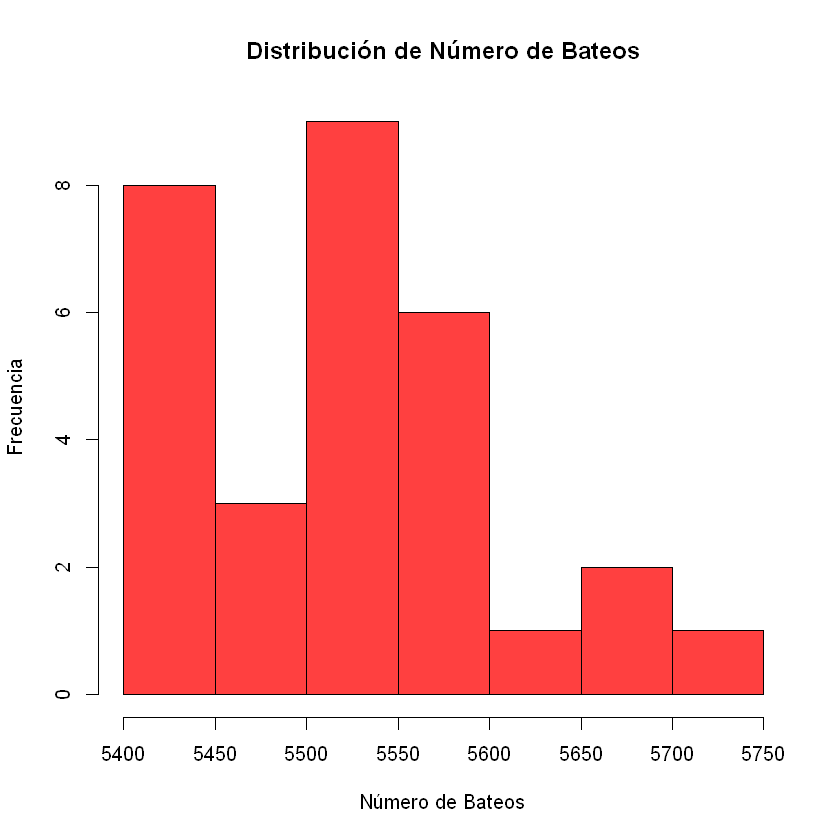

In [25]:
hist(beisbol$numero_bateos, col = "brown1", main = "Distribución de Número de Bateos",
     xlab = "Número de Bateos", ylab = "Frecuencia")

**Interpretación de los resultados.-** El histograma de `numero_bateos` muestra la distribución de la cantidad de bateos de los equipos la MBL. Se aprecia que hay pocos equipos que alcancen una cantidad de bateos superior a **5600**.
   

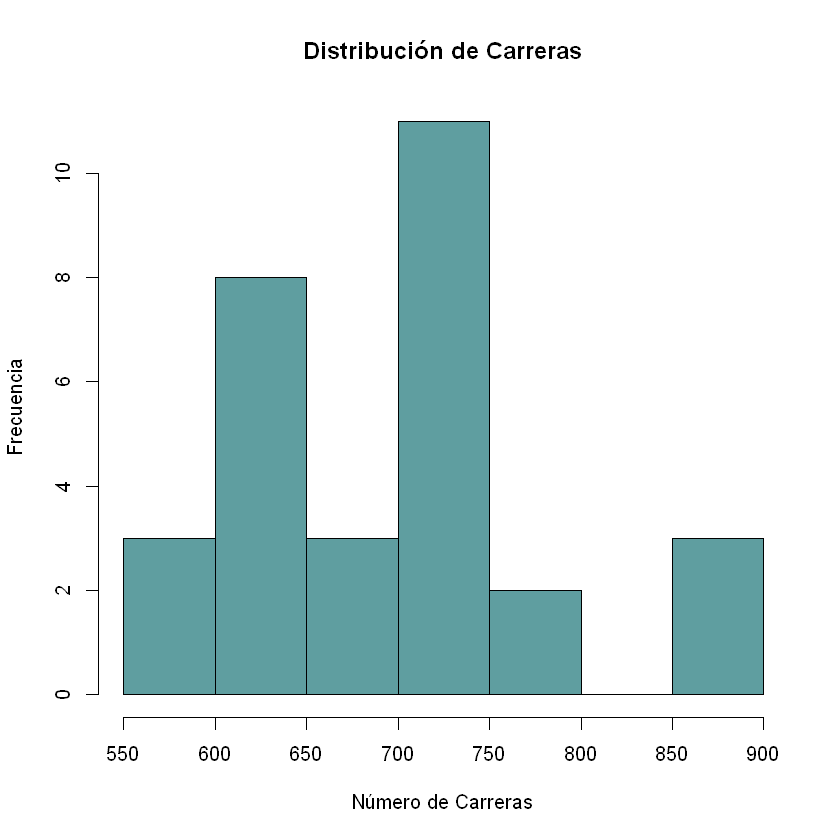

In [26]:
hist(beisbol$runs, col = "cadetblue", main = "Distribución de Carreras",
     xlab = "Número de Carreras", ylab = "Frecuencia")

**Interpretación de los resultados.-** El histograma de `runss` muestra la distribución de la cantidad de carreras logradas por los equipos la MBL. Se puede apreciar que mayormente los equipos suelen lograr entre **700** y **750** carreras.
   

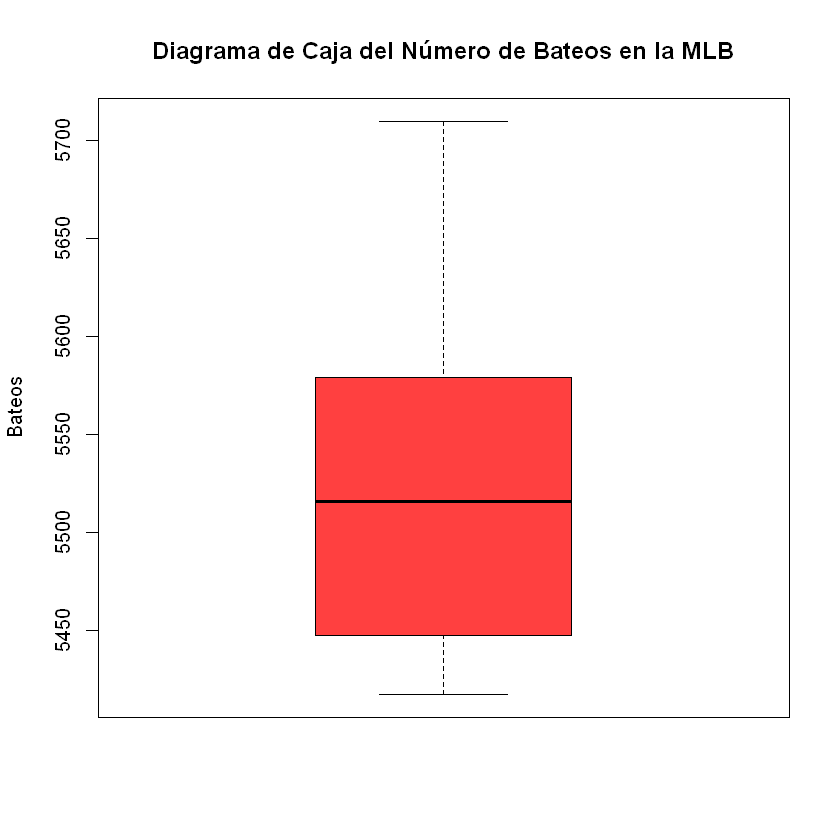

In [27]:
boxplot(beisbol$numero_bateos, #Realizamos un diagrama de caja del numero de bateos
        main= 'Diagrama de Caja del Número de Bateos en la MLB',
        ylab='Bateos', col= 'brown1')

**Interpretación de los resultados.-** Con este diagrama de caja de `numero_bateos` podemos concluir que no existen valores atípicos.

In [28]:
resbat= summary(beisbol$numero_bateos); resbat #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para numero_bateos

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5417    5448    5516    5524    5575    5710 

In [29]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual nos redondea los resultados en este caso
meanbat= mean(beisbol$numero_bateos); meanbat 
medianbat= median(beisbol$numero_bateos); medianbat

[1] 5523.5

[1] 5515.5

**Interpretación de los resultados.-** Utilizando la función **`summary()`** en la variable `numero_bateos`, obtenemos un conjunto de estadísticas descriptivas clave que hemos comprobado posteriormente en pos de validar los resultados obtenidos por dicha función.

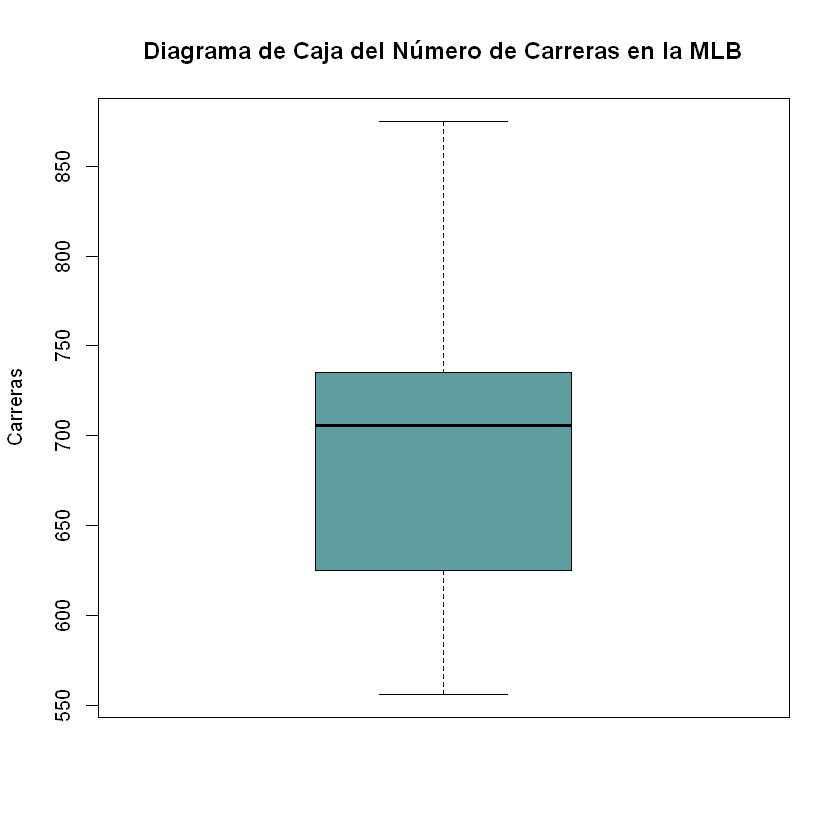

In [30]:
boxplot(beisbol$runs, #Realizamos un diagrama de caja del numero de carreras
        main= 'Diagrama de Caja del Número de Carreras en la MLB',
        ylab='Carreras', col= 'cadetblue')

**Interpretación de los resultados.-** De la misma forma que anteriormente, se ha realizado un diagrama de caja de la variable `runs` de donde podemos extraer que no posee ningún valor atípico.

In [31]:
resruns= summary(beisbol$runs); resruns #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para runs

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  556.0   629.0   705.5   693.6   734.0   875.0 

In [32]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanruns= mean(beisbol$runs); meanruns 
medianruns= median(beisbol$runs); medianruns

[1] 693.6

[1] 705.5

**Interpretación de los resultados.-** Nuevamente, utilizando la función **`summary()`** esta vez en la variable `runs`, obtenemos el mismo conjunto de estadísticas descriptivas clave que hemos comprobamos una vez más.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Para realizar una modelización primero debemos asegurarnos de que existe una relación entre las variables `numero_bateos` y `runs` y así poder aplicar el modelo de regresión lineal.

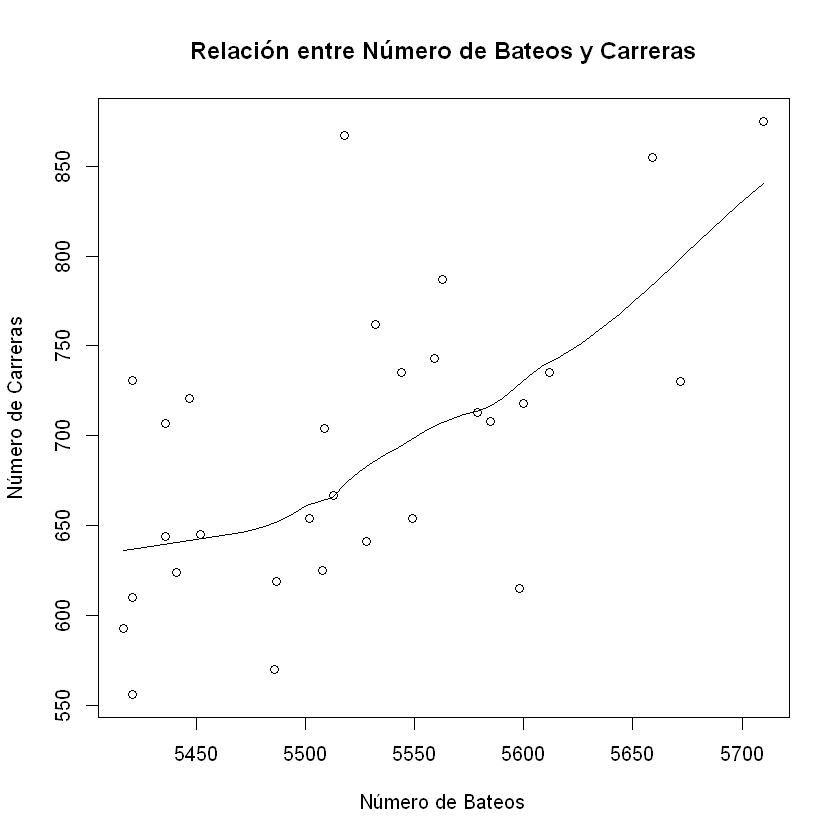

In [33]:
scatter.smooth(x = beisbol$numero_bateos, y = beisbol$runs, #Gráfica de dispersión 
               main = "Relación entre Número de Bateos y Carreras",
               xlab = "Número de Bateos", ylab = "Número de Carreras")

**Interpretación de los resultados.-** A simple vista prodría parecer que, en el gráfico de dispersión, existen varios valores alejados de la curva lo que podría aparentar una ausencia de correlación entre las variables. Sin embargo, la gran mayoria de puntos se encuentran ubicados en las inmediaciones a dicha curva. De igual forma, este resultado se corroborará de forma numérica.

In [34]:
#Coeficiente de correlación
cor(beisbol$numero_bateos, beisbol$runs)

[1] 0.610627

**Interpretación de los resultados.-** El coeficiente de correlación es distinto de **0** por lo que es posible que los datos esten relacionados. Continuaremos con un contraste de correlación para corroborar el correcto cálculo de este coeficiente.

In [35]:
cor.test(beisbol$numero_bateos, beisbol$runs)


	Pearson's product-moment correlation

data:  beisbol$numero_bateos and beisbol$runs
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


**Interpretación de los resultados.-** El **p**-valor obtenido es $= 3.388e-4$ siendo $\alpha = 0.05$. Por lo tanto, tenemos que rechazar la hipótesis nula de que la correlación sea **0**. Esto implica que *existe* una correlación entre el numero de bateos de un equipo y la cantidad de carreras que logran. Concretamente, al ser el coeficiente de correlación $= 0.610627$, podemos determinar que existe una relación directa y,vpor tanto, cuanto mayor es el número de bateos, más carreras consiguen los equipos.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

El Modelo de Regresión Lineal Simple (MLRS) que tenemos que estimar será el definido por la siguiente ecuación:

\begin{align*}
runs_{i}&=\beta_{0}+\beta_{1}*numero\_bateos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [36]:
modelo = lm(runs ~ numero_bateos, data = beisbol)  #Estimación del modelo de regresión lineal
modelo


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Coefficients:
  (Intercept)  numero_bateos  
   -2789.2429         0.6305  


**Interpretación de los resultados.-** Los coeficientes del modelo de regresión lineal son $\beta_0 = -2789.2429$ y $\beta_1 = 0.6305$ donde la variable dependiente es la cantidad de carreras logradas por cada equipo y la independiente el número de bateos realizado por cada equipo. El valor de $\beta_0 = -2789.2429$ representa el valor de la intersección con el eje, es decir, se interpreta como el inicio sin considerar bateos previos existentes e indica la cantidad de carreras realizadas cuando la media de bateos sea de **0**. Luego, el coeficinte $\beta_1 = 0.6305$ nos muestra como cambia la cantidad de carreras en función del número de bateos . Específicamente, indica que por cada bateo las carreras aumentan en $0.6305$. Al ser u coeficiente positivo, se sugiere una relación directa y proporcional entre ambas variables, donde a mayor número de bateos más carreras se realizarán.

In [37]:
str(modelo)

List of 12
 $ coefficients : Named num [1:2] -2789.243 0.631
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "numero_bateos"
 $ residuals    : Named num [1:30] 76 63.8 68.5 -57.2 63 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ effects      : Named num [1:30] -3799 -271.2 55.1 -80.1 52.4 ...
  ..- attr(*, "names")= chr [1:30] "(Intercept)" "numero_bateos" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:30] 779 811 719 787 699 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:30, 1:2] -5.477 0.183 0.183 0.183 0.183 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:30] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "numero_bateos"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.38
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 28
 $ xlevels     

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Al realizar el modelo de regresión lineal se obtienen las siguientes salidas que debemos analizar:
+ Coeficientes de regresión estimados.
+ Valores ajustados de la variable dependiente.
+ Residuos estimados.
+ Grados de libertad.
+ Suma de cuadros de los residuos.
+ Errores de los coeficientes de regresión estimados.
+ Coeficientes de determinación.
+ Intervalos de confianza para los coeficientes de regresión
+ Estadístico F y su p-valor

In [38]:
#Aplicamos summary para obtener los principales resultados
output= summary(modelo)
output


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**Interpretación de los resultados.-** Veamos cada uno de los elementos que presenta el objeto `output`. Los valores de los **coeficientes de regresión** se representan en la columna `Estimate`. Los **errores típicos de los parámetros estimados** $\hat{\beta}_{0}$ y $\hat{\beta}_{1}$ se encuentran en la columna `Std Error` de la salida anterior. En el ejemplo, sus valores son $853.6957$ y $0.1545$ respectivamente. Luego veremos cómo obtenerlos y su interpretación.

La columna `t value` contiene el estadístico `t`, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los **contrastes de significatividad individual sobre los parámetros estimados** cuya hipótesis nula y alternativa son $H_0:\hat{\beta}_{0}=0$ y $H_0:\hat{\beta}_{1}=0$. Los correspondientes p-valores aparecen en la columna `Pr(>|t|)`. En este caso, es pequeño (menor que el nivel de signifcación por defecto $5\%$) en ambas variables. Luego, se rechazaría la hipótesis nula y por tanto, sería estadísticamente significativo el coeficiente estimado para $\hat{\beta}_{0}$ y $\hat{\beta}_{1}$.

El estimador de la **desviación típica de los errores** $\sigma$ aparece como `Residual standard error` y su valor en este caso es igual a $66.47$ siendo $28$ el número de grados de libertad `degrees of freedom` que se calcula como el número total de obervaciones - número de parámetros estimados = $30 - 2 = 28$. Finalmente, aparecen otra serie de indicadores que veremos a continuación con más detalle. En resumen, el modelo de regresión lineal simple para la ecuación de carreras una vez estimados los coeficientes de regresión quedaría del siguiente modo:

\begin{align*}
runs_{i}&=-2789.2429 + 0.6305* numero\_bateos_{i}+\hat \epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

A continuación, extraeremos los coeficientes de regresión estimados.
+ Usando el output
+ Usando la función coef()

In [39]:
#Extracción de los coeficientes de regresión utilizando output 
output$coef[,1]

(Intercept) numero_bateos 
  -2789.24289       0.63055

In [40]:
#Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat

(Intercept) numero_bateos 
  -2789.24289       0.63055

**Interpretación resultados.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -2789.2429$ y $\beta_1 = 0.6305$. La interpretación de los parámetros $\beta_0$ y $\beta_1$ en un modelo de regresión lineal simple donde la variable dependiente es el número de carreras y la variable independiente es el número de bateos es fundamental para comprender la relación entre estas dos variables. En este caso, $\beta_0 = -2789.2429$ representa el valor de la intersección con el eje y, lo que implica el número de carreras estimado cuando el número de bateos es cero. Este valor puede ser interpretado como el **coeficiente del carreras base o de inicio sin considerar el número de bateos**. Por otro lado, $\beta_1 = 0.6305$ es el coeficiente de la pendiente y muestra cómo cambia la cantidad de carreras en función de la cantidad de bateos. Específicamente, indica que **por cada bateo adicional, se espera un aumento** de $0.6305$ unidades en el número de carreras. Este coeficiente positivo sugiere una relación directa y proporcional entre la el número de bateos y el número e carreras,m donde una mayor cantidad ed bateos se asocia con más carreras.

Ahora, extraemos los valores ajustados de la variable dependiente sobre el modelo estimado.
+ Usando el modelo.
+ Usando la función fitted().
+ Manualmente

In [41]:
head(modelo$fitted.values)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [42]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
head(yhat)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [43]:
#Calculamos manual de los valores ajustados 
yajustado = bhat[1]+bhat[2]*beisbol$numero_bateos
head(yajustado)

[1] 779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

**Interpretación resultados.-** Estos valores ajustados, (no confundir con valores predichos), son el resultado de aplicar la ecuación de regresión a los valores observados de la variable independiente. En términos prácticos, representan lo que el modelo anticipa que debería ser la cantidad de carreras para un determinado número de bateos. La interpretación de estos valores es directa: **indican el la cantidad de carreras que puede esperarse, según el modelo, para un equipo con una cantidad de bateos determinada**. La comparación de estos valores ajustados con los valores observados de número de carreras permite evaluar la precisión y utilidad del modelo. Si los valores ajustados se alinean estrechamente con los valores observados, indica que el modelo es un buen predictor de la cantidad de carreras en función del nñumero de bateos. Sin embargo, las discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en las carreras logradas.


Proseguimo extrayendo los valores de los residuos.
+ Usando el modelo estimado.
+ Usando la función resid().
+ Manualmente con el output.

In [44]:
#Extraemos directamente del valor de los residuos estimados usando el modelo
head(modelo$residuals)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [45]:
#Extraemos el valor de los residuos estimados con la función `resid`
uhat = resid(modelo)
head(uhat)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [46]:
# Cálculo manual del valor de los residuos
residuos = beisbol$run-yajustado
head(residuos)

[1]  75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [47]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(beisbol$runs,yhat,yajustado,uhat,residuos))

,,yhat,yajustado,uhat,residuos
1,855,779.0395,779.0395,75.96048,75.96048
2,875,811.1976,811.1976,63.80243,63.80243
3,787,718.5067,718.5067,68.49328,68.49328
4,730,787.2367,787.2367,-57.23667,-57.23667
5,762,698.9597,698.9597,63.04033,63.04033
6,718,741.8371,741.8371,-23.83707,-23.83707


In [48]:
# Comprobamos y = y_estimado + residuos_estimados
779.0695+75.96048

[1] 855.03

**Interpretación resultados.-** En este caso, los residuos representan la diferencia entre los valores observados de cantidad de carreras y los valores predichos por el modelo. Estos residuos **son indicativos de la parte de la cantidad de carreras logradas que no se puede explicar solo por con el número de carreras**. Si los residuos son pequeños y distribuidos aleatoriamente alrededor de cero, sugiere que el modelo se ajusta bien a los datos y que el número de bateos es un buen predictor de las carreras logradas por un equipo. Por otro lado, si los residuos son grandes o muestran algún patrón (como aumentar o disminuir sistemáticamente con la cantidad de carreras), esto puede indicar que el modelo no captura completamente la relación entre el número de bateos y el número de carreras, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad como veremos más adelante. En resumen, los residuos proporcionan una importante información sobre la efectividad y las limitaciones del modelo de regresión en el contexto de predecir la cantidad de carreras que logra un equipo a partir del núumero de bateos.

Continuamos extrayendo los grados de libertad estimados.
+ Usando el output
+ Usando la función df.residual()
+ Manualmente con el output

In [49]:
#Extraemos los grados de libertad usando el output
head(output$df)[2]   

[1] 28

In [50]:
#Extraemos el valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 28

In [51]:
#Calculamos manualmente el valor de los grados de libertad
gdl = nrow(beisbol)- output$df[1]
gdl

[1] 28

**Interpretación resultados.-** En un modelo de regresión lineal simple, los grados de libertad se calculan tomando el número total de observaciones y restando el número de parámetros estimados (en este caso, dos parámetros: la intersección y la pendiente). Por lo tanto, si hay 28 grados de libertad, esto implica que el conjunto de datos original tenía 30 observaciones. Los grados de libertad son importantes porque afectan a la precisión de las estimaciones de los parámetros y la robustez de las pruebas estadísticas. Un **número mayor de grados de libertad** generalmente indica una **mayor confiabilidad en las conclusiones estadísticas** derivadas del modelo, ya que se dispone de más datos para estimar los parámetros y evaluar el ajuste del modelo. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor que $100$ sí que se suele identificar con una menor confiabilidad en los resultados. Por lo que lo único que podríamos decir es que estos datos son confiables ya que el número de grados d elibertad es menor de $100$ ($28<100$).

A continuación, extraemos la suma de cuadrados de los residuos.
+ Usando el output
+ Usando la función deviance()
+ Manualmente con los residuos

In [52]:
#Extraemos directamente la suma de cuadrados de los residuos 
head(output$sigma)

[1] 66.47284

In [53]:
#Extraemos el valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 66.47284

In [54]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 66.47284

**Interpretación resultados.-** La suma de cuadrados de los residuos (SSR) es una medida estadística que refleja la variabilidad en una variable dependiente, en este caso, la cantidad de carreras, que no es explicada por el modelo de regresión lineal simple. En el contexto de este modelo, donde la variable independiente es el número de bateos de los equipos, un SSR de $66.47284$ indica la **cantidad total de variabilidad en las carreras logradas que no es capturada por el modelo**. Esta cifra representa la suma de los cuadrados de las diferencias entre los valores observados de las carreras y los valores predichos por el modelo. Un SSR más bajo sugiere que el modelo explica una mayor proporción de la variabilidad en las carreras, mientras que un valor más alto indicaría que hay factores adicionales, no considerados en el modelo, que influyen en la cantidad de carreras. En resumen, **mientras menor sea el valor de SSR, mejor es el ajuste del modelo a los datos**. Por lo tanto, un SSR de $66.47284$ puede ser interpretado como una indicación de que, aunque el número de bateos tiene un efecto sobre las carreras, hay otros factores significativos que también afectan a la cantidad de carreras y que no están incluidos en el modelo actual. Hay que tener en cuenta que un valor bajo se considera entre ($0, 0.1$). 


Ahora, extraemos los errores de los parámetros estimados.
+ Usando el output
+ Manualmente a partir de la ecuación:

    \begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [55]:
#Extraemos directamente los errores de los coeficientes de regresión
output$coef[,2]

(Intercept) numero_bateos 
  853.6957215     0.1545414

In [56]:
#Calculamos manualmente los errores de los coeficientes de regresión
#Obtenemos la matriz de var-cov directamente
varcov = vcov(modelo)
varcov

,(Intercept),numero_bateos
(Intercept),728796.385,-131.91800433
numero_bateos,-131.918,0.02388305


In [57]:
#Obtenemos los errores estándar de los parámetros estimados
se = sqrt(diag(varcov))
print(se)

  (Intercept) numero_bateos 
  853.6957215     0.1545414 


In [58]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
X = as.matrix(cbind(cte=1,beisbol[,2]))
head(X)

cte,
1,5659
1,5710
1,5563
1,5672
1,5532
1,5600


In [59]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,
cte,728796.385,-131.91800433
,-131.918,0.02388305


In [60]:
# Obtenemos los errores estándar de los parámetros estimados
se2 = sqrt(diag(varcov2))
print(se2)

        cte             
853.6957215   0.1545414 


**Interpretación resultados.-** La interpretación de los errores estándar de los coeficientes en un modelo de regresión lineal simple es crucial para **entender la precisión de las estimaciones de los coeficientes**. En este caso, donde la variable dependiente es la cantidad de carreras que logra un equipo y la variable independiente es el número de bateos, un error estándar de $853.6957215$ para $\beta_0$ (la intersección) y de $0.1545414 $ para $\beta_1$(la pendiente) proporciona información sobre la confiabilidad de esos estimadores. El error estándar de $\beta_0$ indica que hay una variabilidad bastante significativa en la estimación del número de carreras base, independiente de la cantidad de bateos ya que un valor más alto del error estándar sugiere una menor precisión en la estimación de este coeficiente. Por otro lado, el error estándar de $\beta_1$ más bajo sugiere que hay más precisión en la estimación del efecto del número de bateos sobre la cantidad de carreras logradas. En términos prácticos, mientras menor sea el error estándar de un coeficiente, mayor es la confianza en que la estimación del coeficiente es correcta.

Preseguimos con la extracción de los coeficientes de determinación.
+ Usando el output.
+ Manualmente a partir de la ecuación 1:
\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

    siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores  originales de la variable dependiente $y_i$ y el valor promedio de dicha variable $\bar y_i$ tal y como aparece en la siguiente imagen.

+ Manualmente a partir de la ecuación 2:
\begin{align*}
R^{2}=\frac{VE}{VT}
\end{align*}

    siendo `VE` la varianza de los valores ajustados de la variable dependiente y `VT` la varianza de los valores originales de la variable dependiente.

In [61]:
#Usando el output
R2 = output$r.squared
R2

[1] 0.3728654

In [62]:
# Cálculo manual del coeficiente de determinación (Ecuación 1)
residuos2 = beisbol$runs-mean(beisbol$runs)
residuos2

[1]  161.4  181.4   93.4   36.4   68.4   24.4  173.4   27.4   41.4  -78.6
[11]   14.4  -49.6  -39.6   41.4  -26.6   19.4  -39.6   10.4   37.4   49.4
[21]  -74.6  -68.6  -83.6  -48.6   13.4  -52.6  -69.6 -123.6 -100.6 -137.6

In [63]:
#Cálculo manual del coeficiente de determinación (Ecuación 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.3728654

In [64]:
#Cálculo manual del coeficiente de determinación (Ecuación 2)
R2.2 = var(yhat)/var(beisbol$runs)
R2.2

[1] 0.3728654

In [65]:
#Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.3728654,0.3728654,0.3728654


**Interpretación resultados.-** El coeficiente de determinación $R^2$, es una medida fundamental en la interpretación de un modelo de regresión lineal simple. En este caso, donde la variable dependiente es la cantidad de carreras y la variable independiente es el número de bateos, un $R^2$ igual a $0.3728654$ significa que aproximadamente el 37.28% de la **variabilidad en las carreras puede ser explicada por el número de bateos**. Este valor implica que, aunque existe una relación entre el número de bateos y la cantidad de carreras logradas, hay otros factores significativos que también influyen en el nivel de salarios y que no están incluidos en el modelo. El $R^2$ de este tamaño sugiere que, aunque el número de bateos es un factor importante, es solo uno de varios elementos que determinan el nivel de salarios, dejando un amplio porcentaje de la variabilidad en las carreras (más del 60%) atribuible a otros factores no contemplados en el modelo.

**[`Coeficiente de determinación ajustado`]** Tener en cuenta que el valor del coeficiente $R^2$ está relacionado con el número de variables independientes que consideramos. En este sentido, si agregamos variables independientes a nuestro modelo, $R^2$ mejorará, por el simple hecho de incluir más variables en el modelo. Luego, $R^2$ tiende a **sobreestimar el proder predictivo del modelo**, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independiente. En este caso, no es una preocupación ya que tenemos una única variable independiente pero tendremos que tenerlo en cuenta en los modelos de regresión múltiple. La ecuación de $R^2_{adj}$ sería la siguiente:

\begin{align*}
R_{adj}^2 = 1 - \left( {1 - {R^2}} \right)\frac{{n-1}}{{n-k}}
\end{align*}

siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados. En la ecuación se puede observar que al encontrarse el parámetro $k$ en el denominador, disminuye el valor alcanzado por $R^2_{adj}$ a medida que se incorpore una nueva variable independiente (un nuevo parámetro estimado).

Podemos obtener el  $R^2_{adj}$ de la siguiente forma:
+ Usando el output.
+ Manualmente por medio de su ecuación.

In [66]:
#Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj = output$adj.r.squared
R2adj

[1] 0.3504677

In [67]:
#Obtenemos R2 ajustado a través de su ecuación
R2adj_2 = 1-(1-R2)*((30-1)/(30-2))
R2adj_2

[1] 0.3504677

Continuamos con la extracción d3e los intervalos de confianza.
+ Usando la función confint() sobre el modelo. 

In [68]:
ci.bhat = confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),-4537.9592982,-1040.5264727
numero_bateos,0.3139863,0.9471137


In [69]:
#Para un nivel de confianza del 90%
ci.bhat2 = confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),-4241.4910857,-1336.9946852
numero_bateos,0.3676548,0.8934452


**Interpretación resultados.-** Los intervalos de confianza nos proporcionan información sobre el par de números entre los cuales se estima que estará el valor de cada uno de los coeficientes estimados con un determinado nivel de confianza. El nivel de confianza y la amplitud del intervalo varían conjuntamente, de forma que un intervalo más amplio tendrá más probabilidad de acierto (**mayor nivel de confianza**), mientras que para un intervalo más pequeño, que ofrece una estimación más precisa, aumenta su probabilidad de error (**menor nivel de confianza**). En cierto modo, el rango de los intervalos de confianza podría ser interpretado como una `medida de precisión` a la hora de realizar nuestras estimaciones. Un rango próximo a $0$, querrá decir que el nivel de precisión a la hora de estimar dichos coeficientes de regresión es alto y viceversa.

Por último, obtenemos el estadístico F y su p-valor.
+ Por medio de la función `anova()` sobre el modelo.

In [70]:
anova.ols = anova(modelo)
anova.ols[c(4,5)]

,F value,Pr(>F)
numero_bateos,16.64751,0.0003388351
Residuals,NA,NA


In [71]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**Interpretación resultados.-** En este caso, la función **`anova()`** la utilizamos para contrastar la **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_0=\beta_1=0$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación fijado por defecto ($5\%$). Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

### 02 Ejercicio

El archivo de datos `USA.txt` contiene datos demográficos, sociales y económicos de los $50$ estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Cargar el dataset en R y transformarlo en un dataframe
2. Exploración inicial de la base de datos 
3. Análisis de la existencia de relación lineal entre las variables seleccionadas
4. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
5. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

Cargamos el dataset USA contenido en un archivo `.txt`en un dataframe directamente usando la función `read.table()`.

In [72]:
usa= read.table('USA.txt', header= TRUE) #Cargamos el dataset directamente en un dataframe

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [73]:
#Una vez se han cargado los datos en el DataFrame 'USA.txt' se comienza la exploración inicial de la base de datos
print('Las primeras filas de la base de datos son:')
head(usa) #Mostramos las primeras filas del dataframe

[1] "Las primeras filas de la base de datos son:"


estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,...,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,...,49,1,18,6,1,13.8,8.0,43464,38.36,9
Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,...,26,19,2,14,4,7.7,7.6,63648,40.81,3
Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,...,23,15,2,25,4,13.8,8.4,47044,44.59,11
Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,...,53,16,10,5,0,14.4,7.6,39018,36.88,6
California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,...,18,14,4,31,2,11.4,10.4,57020,60.24,55
Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,...,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [74]:
print('Las últimas filas de la base de datos son:')
tail(usa) #Mostramos las ultimas filas del dataframe

[1] "Las últimas filas de la base de datos son:"


,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,...,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
46,Vermont,1,67.9,7.7,50.7,91.3,34.2,1.0,1.3,1.5,...,11,23,0,29,1,14.6,5.0,55582,66.57,3
47,Virginia,3,202.6,9.1,50.9,86.9,34.7,19.4,5.0,7.9,...,31,20,10,14,1,12.2,6.0,64632,51.16,13
48,Washington,4,101.2,8.7,50.2,90.0,31.6,3.6,7.2,11.2,...,25,23,1,16,2,12.3,8.1,62187,56.16,12
49,West Virginia,3,77.1,8.8,50.7,83.4,17.9,3.4,0.7,1.5,...,36,32,2,7,0,16.0,7.5,43553,35.54,5
50,Wisconsin,2,105.0,7.1,50.4,90.2,26.4,6.3,2.3,5.9,...,24,23,3,29,0,13.7,7.0,53079,52.83,10
51,Wyoming,4,5.8,8.6,49.0,92.1,24.3,0.8,0.8,8.9,...,25,21,0,23,5,12.4,5.3,57512,27.82,3


In [75]:
print('Las variables y el tipo de datos que representan son:')
str(usa) #Mostramos un resumen de las variables y los tipos de datos

[1] "Las variables y el tipo de datos que representan son:"
'data.frame':	51 obs. of  21 variables:
 $ estado        : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int 

In [76]:
#Mostramos la dimensión de la base de datos
print(paste('Esta base de datos consta de', dim(usa)[1], 'filas y', dim(usa)[2], 'columnas.' ))

[1] "Esta base de datos consta de 51 filas y 21 columnas."


In [77]:
print('Las variables de la base de datos son:')
names(usa) #Mostramos los nombres de las variables exclusivamente

[1] "Las variables de la base de datos son:"


[1] "estado"         "region"         "densidad"       "veteranos"     
 [5] "mujeres"        "grad_instituto" "grad_univ"      "afro"          
 [9] "asia"           "hispanos"       "blancos"        "evangelicos"   
[13] "protestantes"   "relig_afro"     "catolicos"      "mormones"      
[17] "jubilados"      "paro"           "salario"        "obama"         
[21] "diputados"

In [78]:
any(is.na(usa)) #Buscamos si falta algún dato en la base de datos

[1] FALSE

Como queremos realizar un estudio para todos los estados, debemos eliminar la información relativo al distrito de Columbia porque puede afectar al estudio.

In [79]:
usa = usa[usa$estado != "District of Columbia", ]

In [80]:
print('Las variables y el tipo de datos que representan este nuevo dataframe son:')
str(usa) #Mostramos un resumen de las variables y los tipos de datos tras quitar el Distrito de Columbia

[1] "Las variables y el tipo de datos que representan este nuevo dataframe son:"
'data.frame':	50 obs. of  21 variables:
 $ estado        : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 10 11 ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 8.3 7.2 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 51.1 51.2 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 85.8 84.4 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 26.2 27.8 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 16 30.5 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 2.4 3.2 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 22.5 8.8 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 57.9 55.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 25 38 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 15 16 ...
 

In [81]:
#Mostramos la dimensión de la nueva base de datos sin Columbia
print(paste('Esta base de datos consta de', dim(usa)[1], 'filas y', dim(usa)[2], 'columnas.' ))

[1] "Esta base de datos consta de 50 filas y 21 columnas."


In [82]:
#Creamos ahora un nuevo dataframe donde seleccionaremos las variables que nos interesan para mayor comodidad en cálculos posteriores
data= usa[,c('grad_univ', 'afro', 'hispanos' ,'blancos', 'obama')] #No escogemos los estados para tener únicamente variables numéricas
head(data)
dataest= usa[,c('estado', 'grad_univ', 'afro', 'hispanos' ,'blancos', 'obama')] #Creamos otro con los estados por si nos es necesario posteriormente
head(dataest)

grad_univ,afro,hispanos,blancos,obama
22.3,26.2,3.9,67.0,38.36
27.5,3.3,5.5,64.1,40.81
26.6,4.1,29.6,57.8,44.59
19.8,15.4,6.4,74.5,36.88
30.5,6.2,37.6,40.1,60.24
36.7,4.0,20.7,70.0,51.49


estado,grad_univ,afro,hispanos,blancos,obama
Alabama,22.3,26.2,3.9,67.0,38.36
Alaska,27.5,3.3,5.5,64.1,40.81
Arizona,26.6,4.1,29.6,57.8,44.59
Arkansas,19.8,15.4,6.4,74.5,36.88
California,30.5,6.2,37.6,40.1,60.24
Colorado,36.7,4.0,20.7,70.0,51.49


**Interpretación de los resultados.-** Se posee un marco de datos o dataframe denominado *`USA`* el cual posee **21 variables**. El dataframe contiene **51 observaciones** (filas) que representan los 50 estados de Estados Unidos más el Distrito de Columbia. Sin embargo, al querer realizar un estudio sobre los distintos estados, la información referente al Distrito de Colmbia es necesario eliminarla. Una vez eliminada, las observaciones (filas) pasar a ser **51**. Existen **21 variables** (columnas) que aportan información en porcentaje sobre la etnia, estudio, religion y estado laboral de los habitantes estadounidenses, así como el porcentaje de la población que votó a Obama en sus segundas elecciones. Analizando más en profundidad se observa que `estados` es una variable categórica (o factor) al contener los nombres de cada uno de los estados (y Columbia), que son valores únicos. El resto de variables muestra valores numéricos o enteros. Para finalizar, tal y como se observa, no existen datos faltantes o nulos.

Para continuar el análisis inicial, realizaremos una tabla de frecuencias absolutas y relativas para la variable factor (`estados`).

In [83]:
abs= table(usa$estado); abs #Realizamos una tabla de frecuencias absolutas


             Alabama               Alaska              Arizona 
                   1                    1                    1 
            Arkansas           California             Colorado 
                   1                    1                    1 
         Connecticut             Delaware District of Columbia 
                   1                    1                    0 
             Florida              Georgia               Hawaii 
                   1                    1                    1 
               Idaho             Illinois              Indiana 
                   1                    1                    1 
                Iowa               Kansas             Kentucky 
                   1                    1                    1 
           Louisiana                Maine             Maryland 
                   1                    1                    1 
       Massachusetts             Michigan            Minnesota 
                   1                   

In [84]:
rela = prop.table(abs); rela #Realizamos la taabla de frecuencias relativas


             Alabama               Alaska              Arizona 
                0.02                 0.02                 0.02 
            Arkansas           California             Colorado 
                0.02                 0.02                 0.02 
         Connecticut             Delaware District of Columbia 
                0.02                 0.02                 0.00 
             Florida              Georgia               Hawaii 
                0.02                 0.02                 0.02 
               Idaho             Illinois              Indiana 
                0.02                 0.02                 0.02 
                Iowa               Kansas             Kentucky 
                0.02                 0.02                 0.02 
           Louisiana                Maine             Maryland 
                0.02                 0.02                 0.02 
       Massachusetts             Michigan            Minnesota 
                0.02                 0.

**Interpretación de los resultados.-** En la tabla de frecuencias absolutas, observamos que efectivamente cada estado esta representado de forma única. Luego, tenemos la tabla de frecuencias relativas que nos informa de cuanta representación hay de cada estado a nivel porcentual. Al haber, 51 valores distinitos para esta variable, cada uno de estos equipos se ve representado por el mismo porcentaje (0.02 o 2%).

Ahora, realizaremos un análisis visual de ls variables `grad_univ`, `afro`, `hispanos` y `blancos`, que representes respectivamente el porcentaje de graduados universitarios, el porcentaje de afroamericanos, el porcentaje de hispanos y el porcentaje de blancos en cada estado. También realizaremos observaciones sobre la variable `obama`. Primero realizaremos unos histogramas para poder detectar patrones en los datos y luego por medio de digramas de cajas (boxplot) analizaremos la posibilidad de valores atípicos. Además, también son interesante medidas claves de estas variables como la varianza o la media, entre otros.

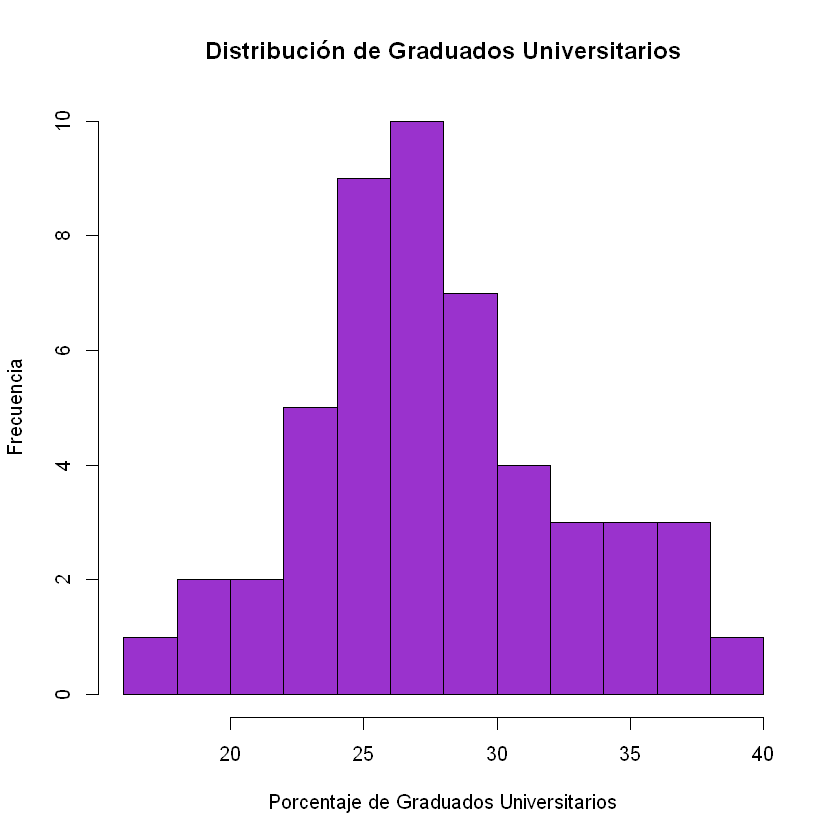

In [85]:
hist(usa$grad_univ, col = "darkorchid3",
     main = "Distribución de Graduados Universitarios",
     xlab = "Porcentaje de Graduados Universitarios",
     ylab = "Frecuencia", breaks=12)

**Interpretación de los resultados.-** El histograma de `grad_univ` muestra la distribución del porcentaje de graduados universitarios en los diferentes estados. Se aprecia que la mayoría de estados presentan un porcentaje de graduados entre el **25-30%**.

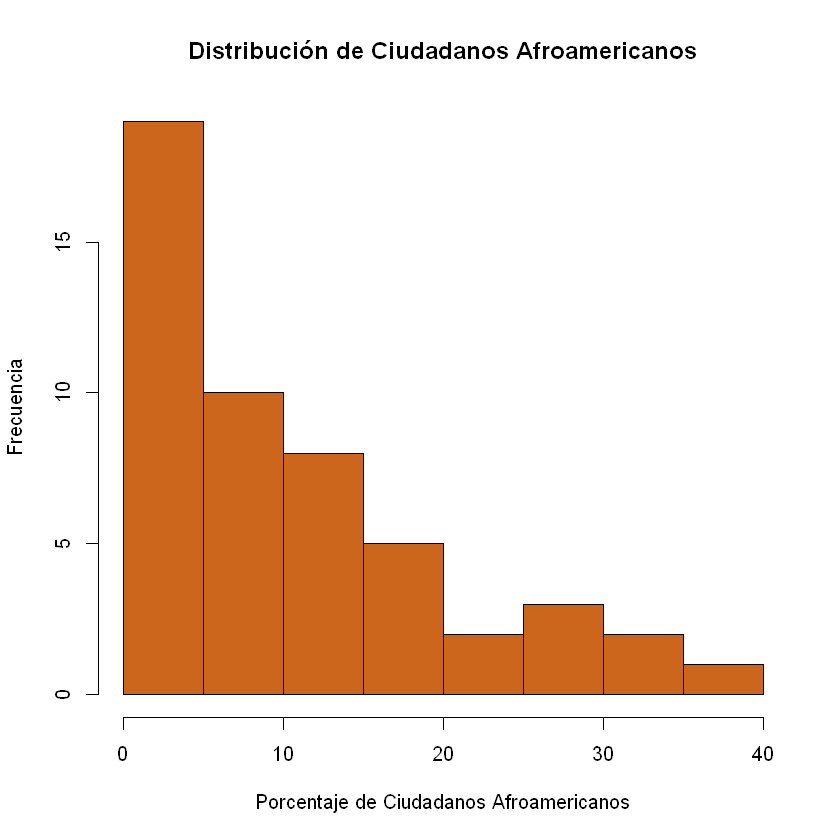

In [86]:
hist(usa$afro, col = "chocolate3",
     main = "Distribución de Ciudadanos Afroamericanos",
     xlab = "Porcentaje de Ciudadanos Afroamericanos",
     ylab = "Frecuencia", breaks=12)

**Interpretación de los resultados.-** El histograma de `afro` muestra la distribución del porcentaje de ciudadanos afroamericanos en los diferentes estados. Se aprecia que la mayoría de estados presentan un porcentaje población afroamericana entre el **0-10%**.

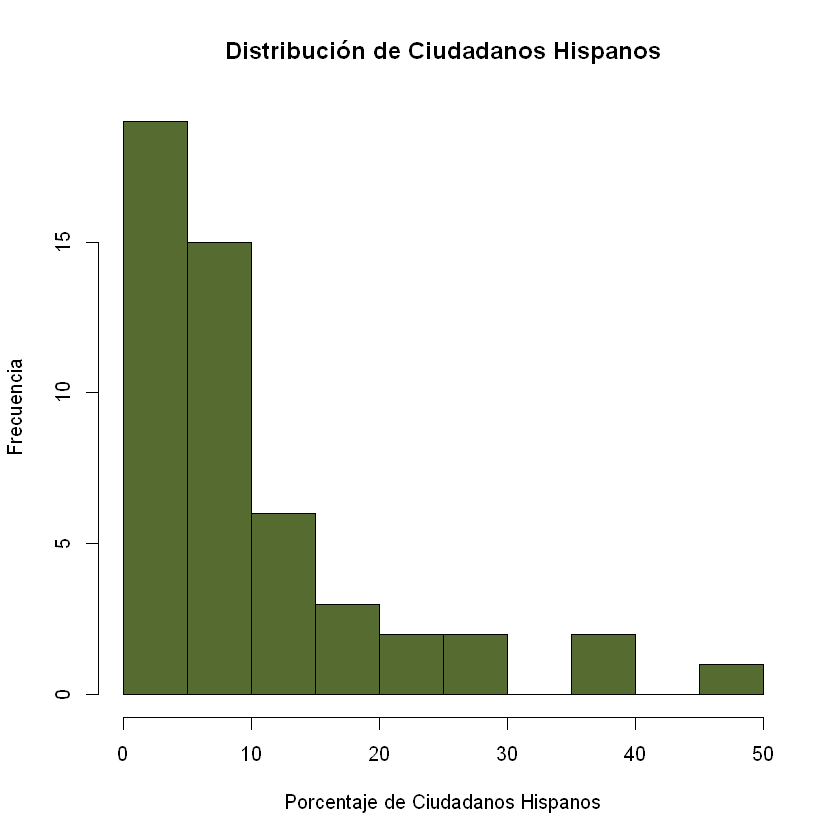

In [87]:
hist(usa$hispanos, col = "darkolivegreen",
     main = "Distribución de Ciudadanos Hispanos",
     xlab = "Porcentaje de Ciudadanos Hispanos",
     ylab = "Frecuencia", breaks=12)

**Interpretación de los resultados.-** El histograma de `afro` muestra la distribución del porcentaje de ciudadanos afroamericanos en los diferentes estados. Al igual que sucede con la población afroamericana, este gráfico muestra que la representación de la población hispana se encuentra entre el **0-10%**.

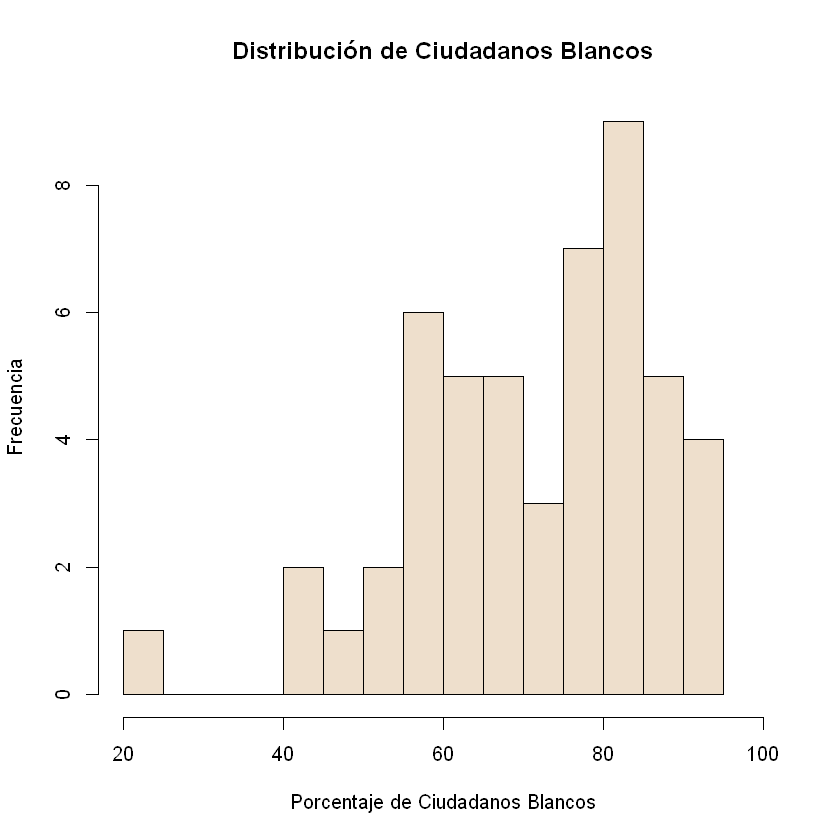

In [88]:
hist(usa$blancos, col = "antiquewhite2",
     main = "Distribución de Ciudadanos Blancos",
     xlab = "Porcentaje de Ciudadanos Blancos",
     ylab = "Frecuencia", breaks=12, xlim= c(20,100))

**Interpretación de los resultados.-** El histograma de `blancos` muestra la distribución del porcentaje de ciudadanos blancos en los diferentes estados. En contraposición a los demás grupos étnicos evaluados, la población blancos se encuentra con una representación entre el 75-95% en un gran número de estados. 

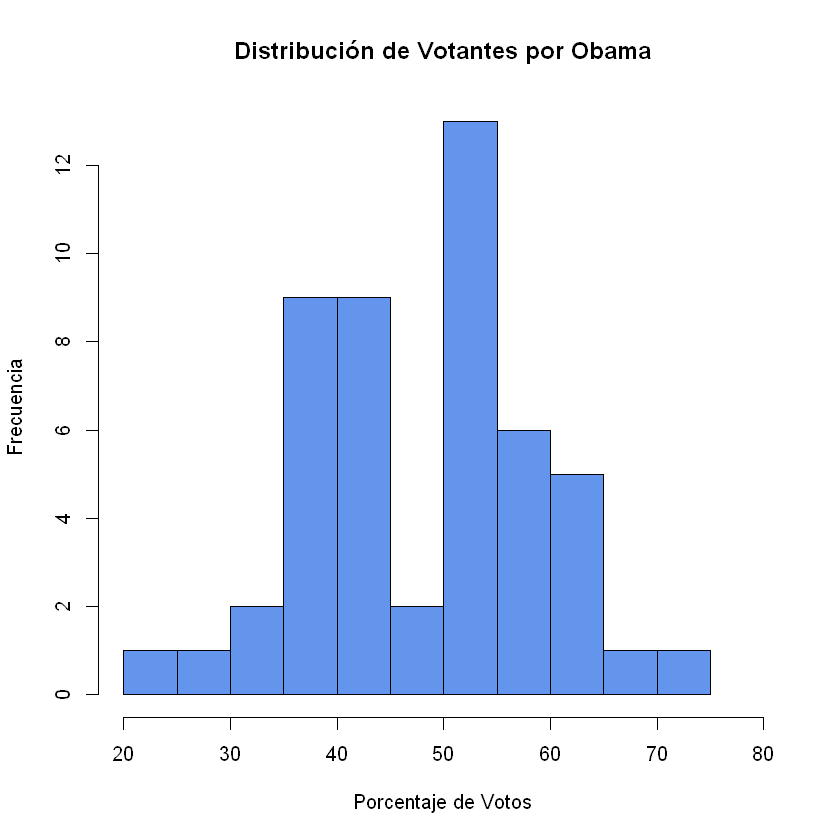

In [89]:
hist(usa$obama, col = 'cornflowerblue',
     main = "Distribución de Votantes por Obama",
     xlab = "Porcentaje de Votos",
     ylab = "Frecuencia", breaks=12, xlim= c(20,80))

**Interpretación de los resultados.-** En este último histograma se ve representada la variable `obama` en donde se observa la distribución del porcentaje de votación por Obama en los distintos Estados. Es apreciable que en varios estados Obama rodondó entre el 35-60% de los votos.

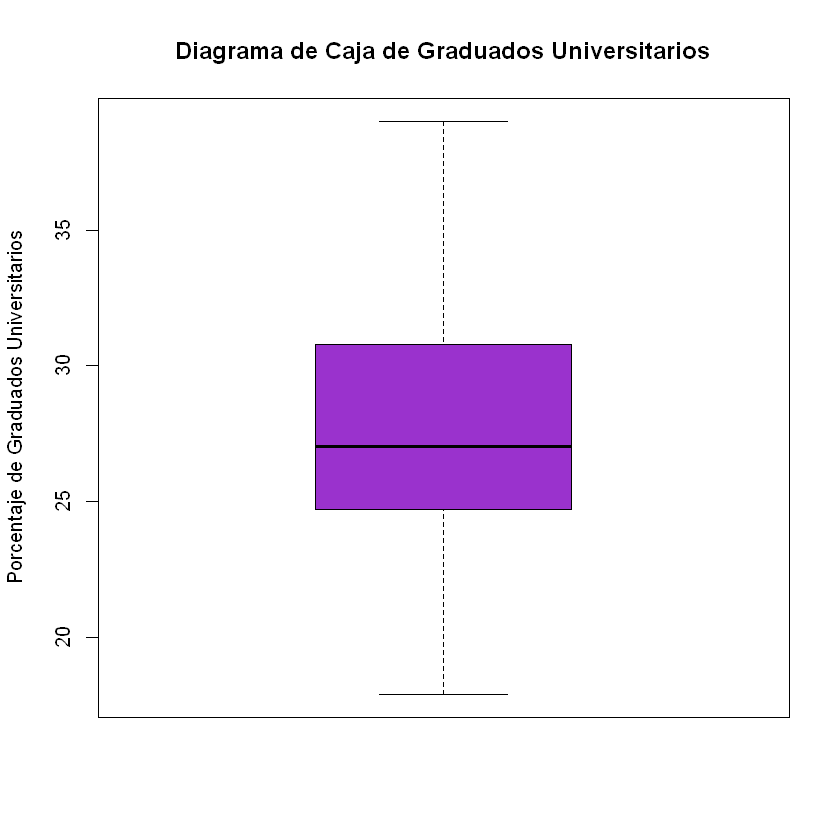

In [90]:
boxplot(usa$grad_univ, col = "darkorchid3",
        main = "Diagrama de Caja de Graduados Universitarios",
        ylab = "Porcentaje de Graduados Universitarios")

In [91]:
resuniv=summary(usa$grad_univ); resuniv #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para grad_univ

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.90   24.70   27.05   27.77   30.73   39.00 

In [92]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanuniv= mean(usa$grad_univ); meanuniv
medianuniv= median(usa$grad_univ); medianuniv

[1] 27.77

[1] 27.05

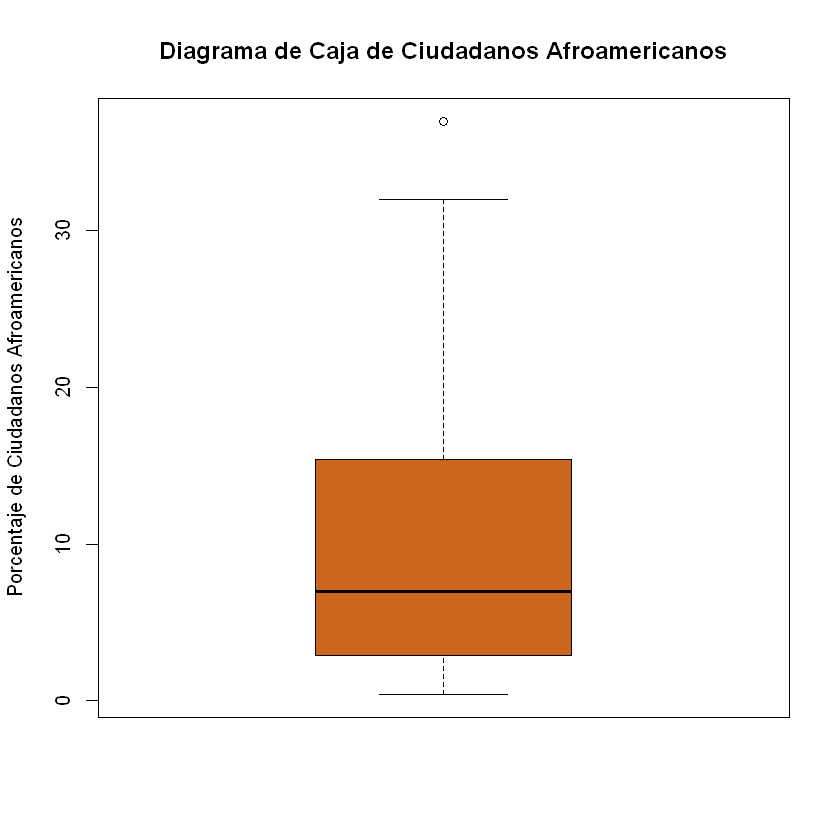

In [93]:
boxplot(usa$afro, col = "chocolate3",
        main = "Diagrama de Caja de Ciudadanos Afroamericanos",
        ylab = "Porcentaje de Ciudadanos Afroamericanos")

In [94]:
resafro=summary(usa$afro); resafro #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para afro

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.40    3.00    7.00   10.33   15.18   37.00 

In [95]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanafro= mean(usa$afro); meanafro
medianafro= median(usa$afro); medianafro

[1] 10.33

[1] 7

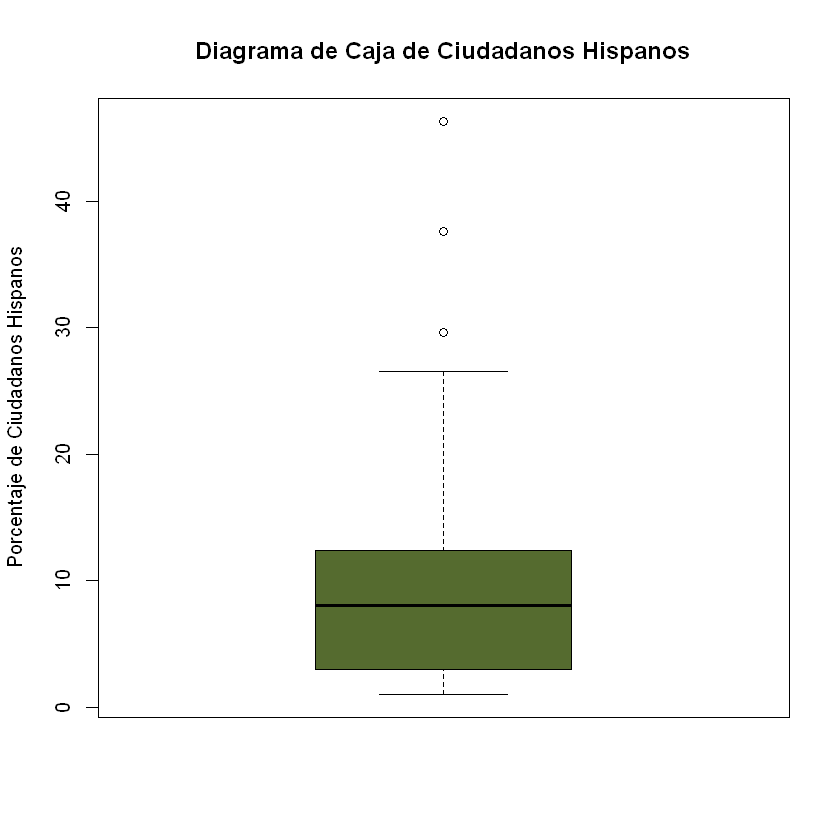

In [96]:
boxplot(usa$hispanos, col = "darkolivegreen",
        main = "Diagrama de Caja de Ciudadanos Hispanos",
        ylab = "Porcentaje de Ciudadanos Hispanos")

In [97]:
reshisp=summary(usa$hisp); reshisp #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para hispanos

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.025   8.050  10.236  12.225  46.300 

In [98]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanhisp= mean(usa$hispanos); meanhisp
medianhisp= median(usa$hispanos); medianhisp

[1] 10.236

[1] 8.05

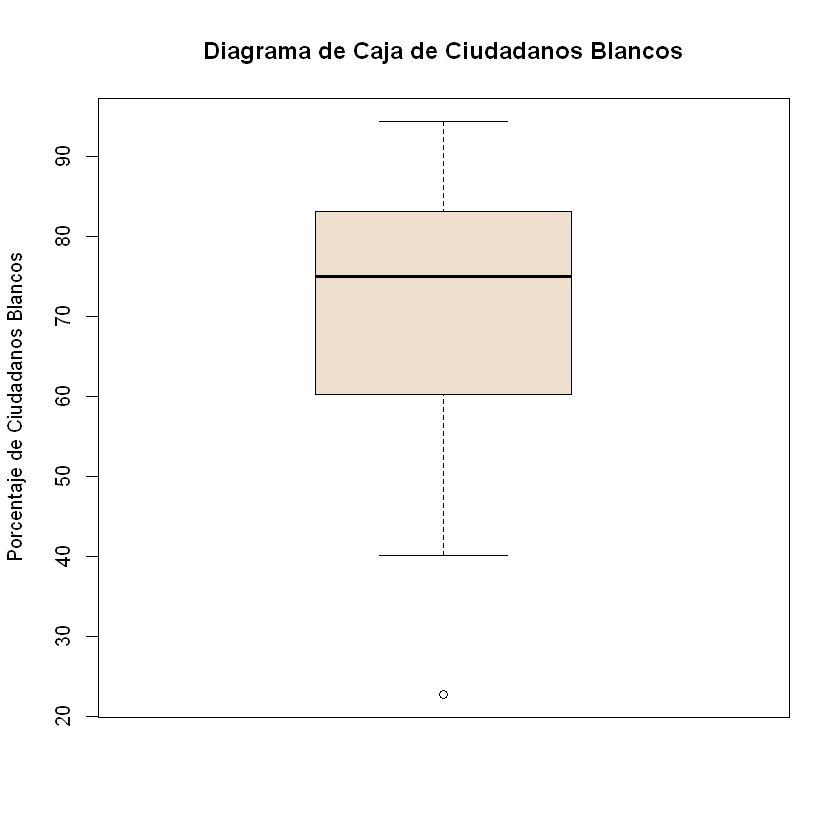

In [99]:
boxplot(usa$blancos, col = "antiquewhite2",
        main = "Diagrama de Caja de Ciudadanos Blancos",
        ylab = "Porcentaje de Ciudadanos Blancos")

In [100]:
resblan=summary(usa$blancos); resblan #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para blancos

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.70   61.15   75.05   71.41   82.85   94.40 

In [101]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanblan= mean(usa$blancos); meanblan
medianblan= median(usa$blancos); medianblan

[1] 71.414

[1] 75.05

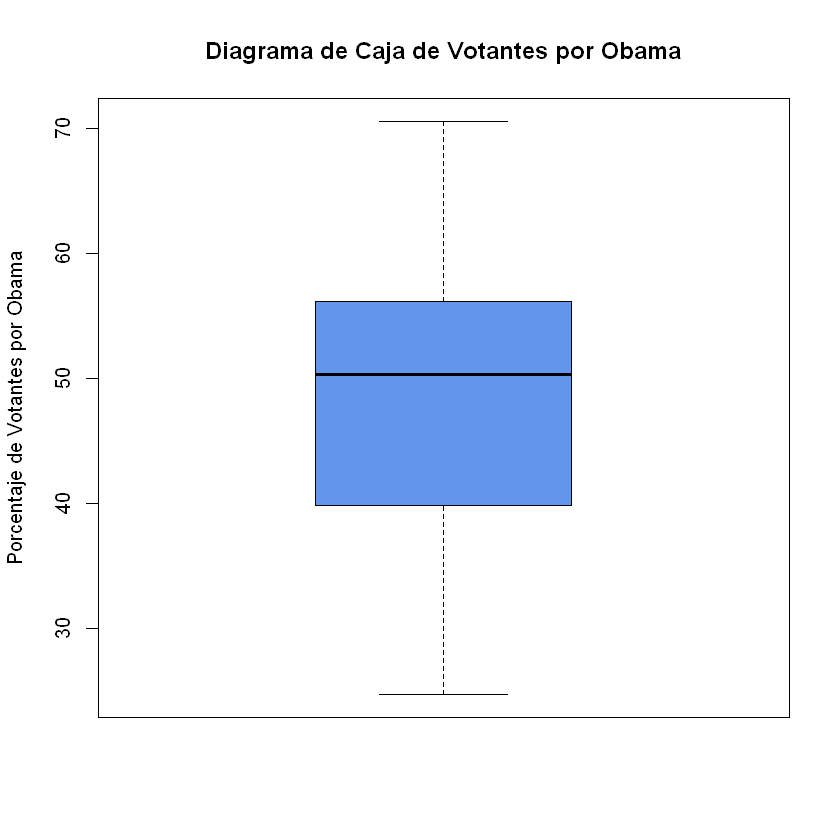

In [102]:
boxplot(usa$obama, col = "cornflowerblue",
        main = "Diagrama de Caja de Votantes por Obama",
        ylab = "Porcentaje de Votantes por Obama")

In [103]:
resobama=summary(usa$obama); resobama #Calculamos los medidas de minimo, maximo, media mediana y los quantiles para obama

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.75   40.05   50.34   48.19   55.68   70.55 

In [104]:
#Se verifica que estas medidas coinciden con las calculadas por la función summary(), la cual redondea los resultados
meanobama= mean(usa$obama); meanobama
medianobama= median(usa$obama); medianobama

[1] 48.188

[1] 50.34

**Interpretación de los resultados.-** Se ha representado en diagramas de cajas (boxplots) las variables `grad_univ`, `afro`, `hispanos`, `blancos` y `obama` en ese mismo orden. En todos los boxplots existen pocos valores atípicos siendo la variable `hispanos` la que más valores atípicos presenta, seguido de la variable `afro`. Además, se ha comprobado numéricamente que los valores de la mediana de los diagramas de cajas coinciden con los dados con la función`summary()` y los valores que está función representa son correctos ya que se comprobaron con cálculos por separado.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Para realizar una modelización primero debemos asegurarnos de que existe una relación entre la variable `obama` con las variables `grad_univ`, `afro`, `hispanos` y `blancos` y así poder aplicar el modelo de regresión lineal.

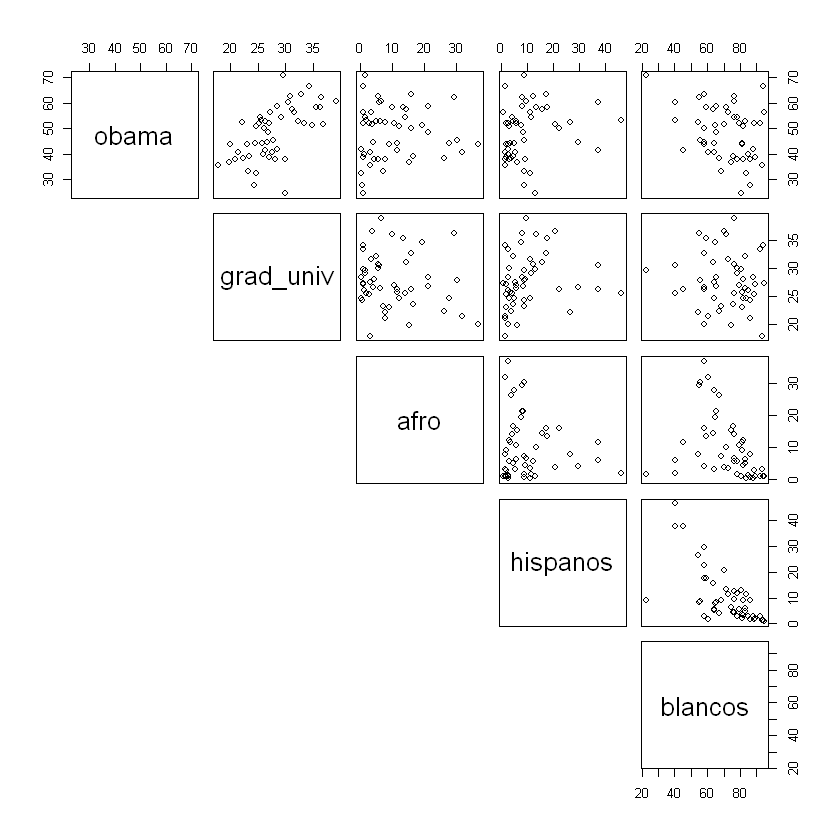

In [105]:
pairs(~obama + grad_univ +afro + hispanos + blancos, data= usa, lower.panel = NULL )

**Interpretación de los resultados.-** Se puede observar que en los gráficos de dispersión no existe un patrón aleatorio al aparecer los puntos colocados de forma relativamente uniforme unos cerca de otros. Esto podrñia indicar la existencia de una relación entre las variables. Entre las variables independientes parece que la varibale `blancos` es la que presenta un patrón menos claro en relación a la variable dependiente `obama`. A continuación lo comprobamos con evidencias numéricas.

In [106]:
cor(data)

,grad_univ,afro,hispanos,blancos,obama
grad_univ,1.00000000,-0.17217220,0.1665000,-0.08357476,0.60307038
afro,-0.17217220,1.00000000,-0.1168446,-0.38977122,0.03194287
hispanos,0.16650002,-0.11684459,1.0000000,-0.65132074,0.19499681
blancos,-0.08357476,-0.38977122,-0.6513207,1.00000000,-0.32846965
obama,0.60307038,0.03194287,0.1949968,-0.32846965,1.00000000


**Interpretación de los resultados.-** Al ser los coeficientes de correlación no nulos existe una posibilidad de que los datos estén relacionados. Realizaremos un contraste de correlación para corroborar la existencia de una relación y el valor de los coeficientes de correlación.

In [107]:
cor.test(data$obama, data$grad_univ) #Coeficiente de correlación con la variable grad_univ


	Pearson's product-moment correlation

data:  data$obama and data$grad_univ
t = 5.2379, df = 48, p-value = 3.569e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3902275 0.7547271
sample estimates:
      cor 
0.6030704 


In [108]:
cor.test(data$obama, data$afro) #Coeficiente de correlación con la variable afro


	Pearson's product-moment correlation

data:  data$obama and data$afro
t = 0.22142, df = 48, p-value = 0.8257
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2486153  0.3075560
sample estimates:
       cor 
0.03194287 


In [109]:
cor.test(data$obama, data$hispanos) #Coeficiente de correlación con la variable hispanos


	Pearson's product-moment correlation

data:  data$obama and data$hispanos
t = 1.3774, df = 48, p-value = 0.1748
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08813459  0.44897552
sample estimates:
      cor 
0.1949968 


In [110]:
cor.test(data$obama, data$blancos) #Coeficiente de correlación con la variable blancos


	Pearson's product-moment correlation

data:  data$obama and data$blancos
t = -2.4094, df = 48, p-value = 0.01986
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.55598440 -0.05516566
sample estimates:
       cor 
-0.3284697 


**Interpretación de los resultados.-** El **p-valor** obtenido para las variables `grad_univ`, `afro` y `blancos` es $< \alpha = 0.05$. Por lo tanto, tenemos que rechazar la hipótesis mula de que la corelación sea igual a **0**. Las implicaciones que esto conlleva es que SÍ existe una correlación entre los porcentajes de graduados universitarios, de ciudadanos afroamericanos y ciudadanos blancos con el porcentaje de población que votó por Obama en su segunda candidatura en cada estado. Es más, podemos destacar que la relación de la variable `obama` es directa a las variables `grad_univ` y `afro`e inversa con la variable `blancos`. Es decir, que a mayor número de graduados universitarios y ciudadanos afroamericanos más son los votos que recibe obama y cuanto mayor es el porcentaje de ciudadanos blancos, menos votos recibe.

Por otra parte, el **p-valor** para la variable `hispanos` es $= 0.1748 > \alpha =0.05$. Por lo que no rechazamos la hipótesis nula de que la correlación sea igual a **0**: Esto implica que no hay suficeintes evidencia para afirma que `hispanos` está relacionada con la variable `obama`. Sin embargo, esto no es suficiente para descartar la variable en el modelo de regresión lineal múltiples directamente ya que podría afectar de igual forma al modelo.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

El Modelo de Regresión Lineal Múltiple (MRLM) para la ecuación de votantes de obama que tenemos que estimar utilizando las funciones de R sería el siguiente:

\begin{align*}
obama_{i}&=\beta_{0}+\beta_{1}grad\_univ_{i}+\beta_{2}afro_{i}+\beta_{3}hispanos_{i}+\beta_{4}blancos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [111]:
modeloobama = lm(obama ~ grad_univ+afro+hispanos+blancos, data = data)  #Estimación del modelo de regresión lineal
modeloobama


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = data)

Coefficients:
(Intercept)    grad_univ         afro     hispanos      blancos  
   35.31386      1.25946     -0.05314     -0.18107     -0.27584  


**Interpretación de los resultados.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = 35.31386$, $\beta_1 = 1.25946$, $\beta_2 = -0.05314$, $\beta_3 = -0.18107$ y $\beta_4 = -0.27584$. En este modelo la variable dependiente es el porcentaje de votos a Obama defindido por la varibale `obama` y las varibles independientes son los porcentajes de presencia en diferentes estados de ciudadanos graduados, afroamericanos, hispanos y blancos. Para este caso $\beta_0 = 35.31386$ representa el valor de intersección con el eje, lo que implica el pocentaje de votantes inicial que hay en cada estado cuando las demás variables son cero. Eso quiere decir, que indistintamente del tipo de población que haya en el estado, el porcentaje inicial de votantes es entorno al 35% y que son las densidades de las demás variables las que rigen cuanto subo o baja ese porcentaje.

Luego, $\beta_1 = 1.25946$ es el coeficiente de la pendiente de la varibale `grad_univ` y muestra como cambian el porcentaje de votos a Obama en función de la cantidad de graduados universitarios en el estado. Específicamente, indica que por cada porcentaje adicional que aumente el porcentaje de graduados universitarios en el estado, los votos a Obama aumentan un $126\%$, por lo que tiene un gran impacto en el porcentaje de votos de cada estado. Que el coeficiente sea positivo indica una relación proporcional directa donde un mayor numero de graduados se asocia con más votantes por Obama. Por otro lado, $\beta_2 = -0.05314$ es el coeficiente de la pendiente que relaciona los votantes por Obama con el porcentaje de ciudadanos afroamericanos en cada estado definido en la variable `afro`. El valor de este coeficiente nos indica que por cada porcentaje adicional que aumente este grupo poblacional, el porcentaje de votantes de obama disminuye un $5\%$. Debido a que el valor del cvoeficiente es negativo, podemos atribuir a ambas variables una relación lineal inversa y proporcional donde a mayor número de ciudadanos afroamericanos menos votos tendrá Obama en las eleciones. Con respecto a $\beta_3 = -0.18107$ es el coeficiente de la pendiente de la variable `hispanos` y muestra como cambia el porcentaje de votantes por Obama en cada estado en función del porcentaje de población hispana. Concretamente, podemos atribuirle a este caso que por cada aumento del $1\%$ en los ciudadanos hispanos reducirá un $18\%$ los votos. Que el signo del coeficiente sea negativo aclara que la relación existente entre amb as variables es inversamente proporcional por lo que a mayor pobleación hispana menor número de votos recibirá Obama. Por último, $\beta_4 = -0.27584$ es el coeficiente de la pendiente de la variable `blancos` y muestra como cambia el porcentaje de votos a Obama en función del porcentaje de población blanca en cada estado. En este caso, nos indica que por cada aumento del 1% en los ciudadanos blancos, los votos por Obama se reducirán un $28\%$. Como el valor del coeficiente de la pendiente es negativo, podemos constatar que la relación entre las varibales `blancos` y `obama` es inversamente proporcional y, por tanto, que a cuanto mayor porcentaje de ciudadanos blancos, menor será el número de votos por Obama.

In [112]:
str(modeloobama)

List of 12
 $ coefficients : Named num [1:5] 35.3139 1.2595 -0.0531 -0.1811 -0.2758
  ..- attr(*, "names")= chr [1:5] "(Intercept)" "grad_univ" "afro" "hispanos" ...
 $ residuals    : Named num [1:50] -4.46 -10.287 -2.704 -0.844 4.711 ...
  ..- attr(*, "names")= chr [1:50] "1" "2" "3" "4" ...
 $ effects      : Named num [1:50] -340.74 -43.43 9.93 7.84 -17.78 ...
  ..- attr(*, "names")= chr [1:50] "(Intercept)" "grad_univ" "afro" "hispanos" ...
 $ rank         : int 5
 $ fitted.values: Named num [1:50] 42.8 51.1 47.3 37.7 55.5 ...
  ..- attr(*, "names")= chr [1:50] "1" "2" "3" "4" ...
 $ assign       : int [1:5] 0 1 2 3 4
 $ qr           :List of 5
  ..$ qr   : num [1:50, 1:5] -7.071 0.141 0.141 0.141 0.141 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:50] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:5] "(Intercept)" "grad_univ" "afro" "hispanos" ...
  .. ..- attr(*, "assign")= int [1:5] 0 1 2 3 4
  ..$ qraux: num [1:5] 1.14 1.01 1.13 1.03 1.06
  ..$ pivot: int [1:5] 1 2 3

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

Al realizar el modelo de regresión lineal se obtienen las siguientes salidas que debemos analizar:
+ Coeficientes de regresión estimados.
+ Valores ajustados de la variable dependiente.
+ Residuos estimados.
+ Grados de libertad.
+ Suma de cuadros de los residuos.
+ Errores de los coeficientes de regresión estimados.
+ Coeficientes de determinación.
+ Intervalos de confianza para los coeficientes de regresión
+ Estadístico F y su p-valor

In [113]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
outputobama = summary(modeloobama)
outputobama


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6319  -4.6727   0.0617   5.7108  14.5189 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.31386   13.60934   2.595   0.0127 *  
grad_univ    1.25946    0.24200   5.204 4.64e-06 ***
afro        -0.05314    0.15398  -0.345   0.7316    
hispanos    -0.18107    0.17266  -1.049   0.2999    
blancos     -0.27584    0.12290  -2.244   0.0298 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.921 on 45 degrees of freedom
Multiple R-squared:  0.4555,	Adjusted R-squared:  0.4071 
F-statistic: 9.411 on 4 and 45 DF,  p-value: 1.291e-05


**Interpretación resultados.-**  Veamos cada uno de los elementos que presenta el objeto `output`. Los valores de los **coeficientes de regresión** ya los hemos comentado (columna `Estimate`). Los **errores típicos de los parámetros estimados** $\hat{\beta}_{0}, \hat{\beta}_{1}, \hat{\beta}_{2}, \hat{\beta}_{3}, \hat{\beta}_{4}$ se encuentran en la columna `Std Error` de la salida anterior. En este caso, sus valores son $13.60934$, $0.24200$, $0.15398$, $0.17266$ y $0.12290$ respectivamente. Luego veremos cómo obtenerlos y su interpretación.

La columna `t value` contiene el estadístico `t`, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los **contrastes de significatividad individual** cuya hipótesis nula y alternativa son $H_0:\hat{\beta}_{0}=0, H_0:\hat{\beta}_{1}=0, H_0:\hat{\beta}_{2}=0, H_0:\hat{\beta}_{3}, H_0:\hat{\beta}_{4}=0$. Los correspondientes p-valores aparecen en la columna `Pr(>|t|)`. En este caso, solo las variables `grad_univ` y `blancos` son menores que el nivel de signifcación por defecto $5\%$. Luego, se rechaza la hipótesis nula en esos casos y por tanto, son estadísticamente significativos los coeficiente estimados para $\hat{\beta}_{1}$ y $\hat{\beta}_{4}$. Como no podemos rechazar la $H_0$ para el caso de las variables `afro` e `hispanos` quiere decir que entonces, $\beta_{2}=\beta_{3}=0$. Lo que implica que dicha variable no nos va a explicar nada de nuestra variable dependiente (`obama`) ya que $0 * afro_i$ y $0 * hispanos_i$ es $0$ . Es decir, podríamos sacarla del modelo.

El estimador de la **desviación típica de los errores** $\sigma$ aparece como `Residual standard error` y su valor en este caso es igual a $7.921$ siendo $45$ el número de grados de libertad `degrees of freedom` que se calcula como el número total de obervaciones - número de parámetros estimados = $50 - 5 = 45$. Finalmente, aparecen otra serie de indicadores que veremos a continuación con más detalle. En resumen, el modelo de regresión lineal **múltiple** para la ecuación de salarios una vez estimados los coeficientes de regresión quedaría del siguiente modo:

\begin{align*}
obama_{i}&= 35.31386+1.25946 * grad\_univ_{i}-0.27584 * blancos_{i}+\hat \epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

A continuación, extraeremos los coeficientes de regresión estimados.
+ Usando el output
+ Usando la función coef()

In [114]:
# Extracción directa de los coeficientes de regresión
outputobama$coef[,1]

(Intercept)   grad_univ        afro    hispanos     blancos 
35.31385817  1.25946212 -0.05313827 -0.18107311 -0.27583861

In [115]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modeloobama)
bhat

(Intercept)   grad_univ        afro    hispanos     blancos 
35.31385817  1.25946212 -0.05313827 -0.18107311 -0.27583861

**Interpretación resultados.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = 35.3139$, $\beta_1 = 1.2594$, $\beta_2 = -0.0531$, $\beta_3 = -0.1811$ y $\beta_4 = -0.2758$. La interpretación de los parámetros $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$ y $\beta_4$ en un modelo de regresión lineal múltiple donde la variable dependiente es el porcentaje de votos por Obama en cada estado y las variables independientes son los porcentajes de la población que pertenecen al grupo de graduados universitarios, afroamericanos, hispanos y blancos en cada estado, respectivamente. En este caso, $\beta_0 = 35.3139$ representa el valor de la intersección con el eje y, lo que implica es que en cada estado, Obama tiene un porcentaje de votos inicial del $35\%$, indistintamemte de la demografía. Este valor puede ser interpretado como el **coeficiente de votos base o inicial**. Por otro lado, las $\beta_1 = 1.2594$, $\beta_2 = -0.0531$, $\beta_3 = -0.1811$ y $\beta_4 = -0.2758$ son los coeficientes de la pendiente y muestran cómo cambia el porcentaje de votos en función de la cantidad de personas de cada grupo poblacional. Específicamente, indica que **por cada unidad que aumenta la comunidad de graduados universitarios, se espera un aumento** de $1.2594$ unidades en el porcentaje de votos. Este coeficiente positivo sugiere una relación directa y proporcional entre la el número de votos y el número de graduados universitarios, donde una mayor cantidad de graduados se asocia con más votos. Además, **por cada unidad que aumentan las comunidades afroamericana, hispana y blanca, se espera una reducción** de $-0.0531$, $-0.1811$ y $-0.2758$ unidades en el porcentaje de votos, respectivamente. El coeficiente negativo sugiere una relación inversa y proporcional entre el número de votos y estas tres comunidades, pòr lo que a medida que estas comunidades aumentan, el porcentaje de votos por Obama disminuye.

Ahora, extraemos los valores ajustados de la variable dependiente sobre el modelo estimado.
+ Usando el modelo.
+ Usando la función fitted().
+ Manualmente

In [116]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modeloobama$fitted.values)

1        2        3        4        5        6 
42.82027 51.09655 47.29445 37.72403 55.52852 58.26665

In [117]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modeloobama)
head(yhat)

1        2        3        4        5        6 
42.82027 51.09655 47.29445 37.72403 55.52852 58.26665

In [118]:
# Cálculo manual de los valores ajustados
yajustado = bhat[1]+bhat[2]*data$grad_univ+bhat[3]*data$afro+bhat[4]*data$hispanos+bhat[5]*data$blancos
head(yajustado)

[1] 42.82027 51.09655 47.29445 37.72403 55.52852 58.26665

**Interpretación resultados.-** Estos valores ajustados, son el resultado de aplicar la ecuación de regresión a los valores observados de las variables independientes. En términos prácticos, representan **lo que el modelo anticipa que debería ser el porcentaje de votos** para una determinada cantidad de graduados universitarios, afroamericanos, hispanos y blancos. La comparación de estos valores ajustados con los valores observados de votos permite evaluar la precisión y utilidad del modelo. Si los valores ajustados se alinean estrechamente con los valores observados, indica que el modelo es un buen predictor delk porcentaje de votos en función de las variables independientes consideradas. Sin embargo, las discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en los votos.

Proseguimos extrayendo los valores de los residuos.
+ Usando el modelo estimado.
+ Usando la función resid().
+ Manualmente con el output.

In [119]:
# Extracción directa del valor de los residuos estimados
head(modeloobama$residuals)

1           2           3           4           5           6 
 -4.4602688 -10.2865531  -2.7044478  -0.8440344   4.7114818  -6.7766487

In [120]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modeloobama)
head(uhat)

1           2           3           4           5           6 
 -4.4602688 -10.2865531  -2.7044478  -0.8440344   4.7114818  -6.7766487

In [121]:
# Cálculo manual del valor de los residuos
residuos = data$obama-yajustado
head(residuos)

[1]  -4.4602688 -10.2865531  -2.7044478  -0.8440344   4.7114818  -6.7766487

In [122]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(data$obama,yhat,yajustado,uhat,residuos))

,,yhat,yajustado,uhat,residuos
1,38.36,42.82027,42.82027,-4.4602688,-4.4602688
2,40.81,51.09655,51.09655,-10.2865531,-10.2865531
3,44.59,47.29445,47.29445,-2.7044478,-2.7044478
4,36.88,37.72403,37.72403,-0.8440344,-0.8440344
5,60.24,55.52852,55.52852,4.7114818,4.7114818
6,51.49,58.26665,58.26665,-6.7766487,-6.7766487


In [123]:
# Comprobamos y = y_estimado + residuos_estimados
42.82027-4.4602688

[1] 38.36

**Interpretación resultados.-** En este caso, los residuos representan la diferencia entre los valores observados de los votos y los valores predichos por el modelo. Estos residuos **son indicativos de la parte de los votosque NO se puede explicar solo por las variables independientes consideradas**. Si los residuos son pequeños y distribuidos aleatoriamente alrededor de cero, sugiere que el modelo se ajusta bien a los datos y que las variables independientes son buenas predictoras del porcentaje de votos. Por otro lado, si los residuos son grandes o muestran algún patrón (como aumentar o disminuir sistemáticamente), esto puede indicar que el modelo no captura completamente la relación entre los grupos de población de cada estado y los votos por Obama, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad como veremos más adelante. En resumen, los residuos proporcionan una importante información sobre la efectividad y las limitaciones del modelo de regresión en el contexto de predecir el porcentaje de votos a partir de las variables independientes.

Continuamos extrayendo los grados de libertad estimados.
+ Usando el output
+ Usando la función df.residual()
+ Manualmente con el output

In [124]:
# Extracción directa del valor de los grados de libertad
head(outputobama$df)[2] 

[1] 45

In [125]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modeloobama)
df

[1] 45

In [126]:
# Cálculo manual del valor de los grados de libertad
gdl = nrow(data) - outputobama$df[1]
gdl

[1] 45

**Interpretación resultados.-** En un modelo de regresión lineal múltiple (igual que en el caso simple), los grados de libertad se calculan tomando el número total de observaciones y restando el número de parámetros estimados (en este caso, cinco parámetros). Por lo tanto, si hay $45$ grados de libertad, esto implica que el conjunto de datos original tenía $50$ observaciones. Los grados de libertad son importantes porque afectan a la precisión de las estimaciones de los parámetros y la robustez de las pruebas estadísticas. Un **número mayor de grados de libertad** generalmente indica una **mayor confiabilidad en las conclusiones estadísticas** derivadas del modelo, ya que se dispone de más datos para estimar los parámetros y evaluar el ajuste del modelo. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor que $100$ sí que se suele identificar con una menor confiabilidad en los resultados. Por lo que lo único que podríamos decir es que estos datos son confiables ya que el número de grados de libertad es menor de $100$ ($45<100$).

A continuación, extraemos la suma de cuadrados de los residuos.
+ Usando el output
+ Usando la función deviance()
+ Manualmente con los residuos

In [127]:
head(outputobama$sigma)

[1] 7.921155

In [128]:
# Extracción del valor de la suma de cuadrados de los residuos con la **función** `deviance`
ssr = sqrt(deviance(modeloobama)/gdl)
ssr

[1] 7.921155

In [129]:
# Cálculo manual** del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 7.921155

**Interpretación resultados.-** La suma de cuadrados de los residuos (SSR) es una medida estadística que refleja la variabilidad en una variable dependiente, en este caso, el porcentaje de votos por Obama en cada estado, que no es explicada por el modelo de regresión lineal múltiple. En el contexto de este modelo, donde hemos considerado cuatro variables independientes, un SSR de $7.92115484$ indica la **cantidad total de variabilidad en el porcentaje de los votos que NO es capturada por el modelo**. Esta cifra representa la suma de los cuadrados de las diferencias entre los valores observados de los votos y los valores predichos por el modelo. Un SSR más bajo sugiere que el modelo explica una mayor proporción de la variabilidad en los porcentajes de los votos, mientras que un valor más alto indicaría que hay factores adicionales, no considerados en el modelo, que influyen en el porcentaje de votos. En resumen, **mientras menor sea el valor de SSR, mejor es el ajuste del modelo a los datos**. Por lo tanto, un SSR de $7.92115484$ puede ser interpretado como una indicación de que, aunque las variables independientes consideradas tiene un efecto sobre los votos, hay otros factores significativos que también afectan y que no están incluidos en el modelo actual. Tener en cuenta que un valor bajo se considera entre ($0, 0.1$).

Ahora, extraemos los errores de los parámetros estimados.
+ Usando el output
+ Manualmente a partir de la ecuación:
\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [130]:
#Extraemos directamente los errores de los coeficientes de regresión
outputobama$coef[,2]

(Intercept)   grad_univ        afro    hispanos     blancos 
 13.6093352   0.2419959   0.1539783   0.1726573   0.1228987

In [131]:
#Calculamos manualmente los errores de los coeficientes de regresión
#Obtenemos la matriz de var-cov directamente
varcov = vcov(modeloobama)
varcov

,(Intercept),grad_univ,afro,hispanos,blancos
(Intercept),185.214003,-1.849959223,-1.402841683,-1.550506067,-1.431419711
grad_univ,-1.849959,0.058562037,0.006422252,-0.001509105,0.002419648
afro,-1.402842,0.006422252,0.023709321,0.013718068,0.011750641
hispanos,-1.550506,-0.001509105,0.013718068,0.029810531,0.016041192
blancos,-1.431420,0.002419648,0.011750641,0.016041192,0.015104102


In [132]:
#Obtenemos los errores estándar de los parámetros estimados
se = sqrt(diag(varcov))
print(se)

(Intercept)   grad_univ        afro    hispanos     blancos 
 13.6093352   0.2419959   0.1539783   0.1726573   0.1228987 


In [133]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
y = data[,1]
X = as.matrix(cbind(cte=1,data[,1:4]))
head(cbind(y,X))

,y,cte,grad_univ,afro,hispanos,blancos
1,22.3,1,22.3,26.2,3.9,67.0
2,27.5,1,27.5,3.3,5.5,64.1
3,26.6,1,26.6,4.1,29.6,57.8
4,19.8,1,19.8,15.4,6.4,74.5
5,30.5,1,30.5,6.2,37.6,40.1
6,36.7,1,36.7,4.0,20.7,70.0


In [134]:
#Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,grad_univ,afro,hispanos,blancos
cte,185.214003,-1.849959223,-1.402841683,-1.550506067,-1.431419711
grad_univ,-1.849959,0.058562037,0.006422252,-0.001509105,0.002419648
afro,-1.402842,0.006422252,0.023709321,0.013718068,0.011750641
hispanos,-1.550506,-0.001509105,0.013718068,0.029810531,0.016041192
blancos,-1.431420,0.002419648,0.011750641,0.016041192,0.015104102


In [135]:
# Obtenemos los errores estándar de los parámetros estimados
se2 = sqrt(diag(varcov2))
print(se2)

       cte  grad_univ       afro   hispanos    blancos 
13.6093352  0.2419959  0.1539783  0.1726573  0.1228987 


**Interpretación resultados.-** La interpretación de los errores estándar de los coeficientes en un modelo de regresión lineal múltiple es crucial para **entender la precisión de las estimaciones de los coeficientes**. En este caso, donde la variable dependiente es el porcentaje de votos y las variables independientes son el porcentaje de graduados universitarios, afroamericanos, hispanos y blancos, los errores estándar asociados a $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$ y $\beta_4$ indican la variabilidad o incertidumbre en la estimación de estos coeficientes. Un error estándar de $13.6093352$ para $\beta_0$ sugiere una variabilidad alta en la estimación del porcentaje de votos por Obama base (sin considerar los otros factores), además que un error estándar de $0.2419959$ para $\beta_1$ , $0.1539783$ para $\beta_2$, $0.1726573$ para $\beta_3$ y $0.1228987$ para $\beta_4$ reflejan una mayor precisión en la estimación del impacto de los cuatro grupos de población, sobre el porcentaje de votos. Cuanto menor sea el error estándar de un coeficiente, mayor será la confianza en que la estimación del coeficiente está cercana al verdadero valor poblacional. Estos errores estándar son cruciales para realizar pruebas de hipótesis sobre los coeficientes y determinar su significancia estadística en el modelo.

Preseguimos con la extracción de los coeficientes de determinación.
+ Usando el output.
+ Manualmente a partir de la ecuación 1:
\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

    siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores  originales de la variable dependiente $y_i$ y el valor promedio de dicha variable $\bar y_i$ tal y como aparece en la siguiente imagen.

+ Manualmente a partir de la ecuación 2:
\begin{align*}
R^{2}=\frac{VE}{VT}
\end{align*}

    siendo `VE` la varianza de los valores ajustados de la variable dependiente y `VT` la varianza de los valores originales de la variable dependiente.

In [136]:
# Extracción directa del valor de los coeficientes de determinación
R2 = outputobama$r.squared
R2

[1] 0.4555018

In [137]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = data$obama-mean(data$obama)
residuos2

[1]  -9.828  -7.378  -3.598 -11.308  12.052   3.302   9.872  10.422   1.822
[10]  -2.708  22.362 -15.568   9.412  -4.258   3.802 -10.198 -10.388  -7.608
[19]   8.082  13.782  12.462   6.022   4.462  -4.398  -3.808  -6.488 -10.158
[28]   4.172   3.792  10.192   4.802  15.162   0.162  -9.498   2.482 -14.958
[37]   6.052   3.782  14.512  -4.098  -8.318  -9.108  -6.808 -23.438  18.382
[46]   2.972   7.972 -12.648   4.642 -20.368

In [138]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.4555018

In [139]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(data$obama)
R2.2

[1] 0.4555018

In [140]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.4555018,0.4555018,0.4555018


**Interpretación resultados.-** El coeficiente de determinación $R^2$, es una medida fundamental en la interpretación de un modelo de regresión lineal múltiple. En este caso, donde la variable dependiente es porcentaje de votos por Obama y las variables independientes son el porcentaje de graduados universitarios, afroamericanos, hispanos y blancos en cada estado, un $R^2$ igual a $0.4555018$ significa que aproximadamente el $45.55\%$ de la **variabilidad en los votos puede ser explicada por dichas variables**. Este valor implica que, aunque existe una relación entre las mismas, hay otros factores significativos que también influyen en los votos por Obama y que no están incluidos en el modelo. El $R^2$ de este tamaño sugiere que, aunque dichas variables son factores importantes, son solo algunos de varios elementos que determinan el porcenmtaje de votos, dejando un amplio porcentaje de la variabilidad en el porcentaje de votos (aprox 55%) atribuible a otros factores no contemplados en el modelo.

**[`Coeficiente de determinación ajustado`]** Tener en cuenta que el valor del coeficiente $R^2$ está relacionado con el número de variables independientes que consideramos. En este sentido, si agregamos variables independientes a nuestro modelo, $R^2$ mejorará, por el simple hecho de incluir más variables en el modelo. Luego, $R^2$ tiende a **sobreestimar el proder predictivo del modelo**, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independiente. En este caso, no es una preocupación ya que tenemos una única variable independiente pero tendremos que tenerlo en cuenta en los modelos de regresión múltiple. La ecuación de $R^2_{adj}$ sería la siguiente:

\begin{align*}
R_{adj}^2 = 1 - \left( {1 - {R^2}} \right)\frac{{n-1}}{{n-k}}
\end{align*}

siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados. En la ecuación se puede observar que al encontrarse el parámetro $k$ en el denominador, <u>disminuye el valor</u> alcanzado por $R^2_{adj}$ <u>a medida que se incorpore una nueva variable independiente</u> (un nuevo parámetro estimado).

Podemos obtener el  $R^2_{adj}$ de la siguiente forma:
+ Usando el output.
+ Manualmente por medio de su ecuación.

In [141]:
# Obtenemos R2 ajustado directamente del output
R2adj = outputobama$adj.r.squared
R2adj

[1] 0.4071019

In [142]:
# Obtenemos R2 ajustado a través de su ecuación formal

R2adj_2 = 1-(1-R2)*((50-1)/(50-5))
R2adj_2

[1] 0.4071019

Continuamos con la extracción de los intervalos de confianza.
+ Usando la función confint() sobre el modelo. 

In [143]:
ci.bhat = confint(modeloobama)
ci.bhat

,2.5 %,97.5 %
(Intercept),7.9032501,62.72446623
grad_univ,0.7720573,1.74686697
afro,-0.3632665,0.25698997
hispanos,-0.5288227,0.16667647
blancos,-0.5233694,-0.02830783


In [144]:
#Para un nivel de confianza del 90%
ci.bhat2 = confint(modeloobama, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),12.4579679,58.16974843
grad_univ,0.8530475,1.66587674
afro,-0.3117337,0.20545713
hispanos,-0.4710385,0.10889223
blancos,-0.4822381,-0.06943909


**Interpretación resultados.-** Los intervalos de confianza nos proporcionan información sobre el par de números entre los cuales se estima que estará el valor de cada uno de los coeficientes estimados con un determinado nivel de confianza. El nivel de confianza y la amplitud del intervalo varían conjuntamente, de forma que un intervalo más amplio tendrá más probabilidad de acierto (**mayor nivel de confianza**), mientras que para un intervalo más pequeño, que ofrece una estimación más precisa, aumenta su probabilidad de error (**menor nivel de confianza**). En cierto modo, el rango de los intervalos de confianza podría ser interpretado como una `medida de precisión` a la hora de realizar nuestras estimaciones. Un rango próximo a $0$, querrá decir que el nivel de precisión a la hora de estimar dichos coeficientes de regresión es alto y viceversa.

Por último, obtenemos el estadístico F y su p-valor.
+ El estadístico F directamente del output.

In [145]:
# Extracción directa del valor del estadístico F
fstat.all = output$fstatistic[1]
print(fstat.all)

   value 
16.64751 


In [146]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**Interpretación resultados.-** En este caso, realizamos el contraste de **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_0=\beta_1=\beta_2=\beta_3=\beta_4$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación fijado por defecto ($5\%$). Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

### 03 Ejercicio 

Utilizando el dataset del ejercicio anterior encontrar de forma automática el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos: 

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

Teniendo en cuenta que nuestra variable dependiente será `obama`, nos preguntamos: ¿**cuál es el mejor modelo** de regresión lineal múltiple que podemos obtener considerando la base de datos $\tt usa$?

In [147]:
# Veamos las variables que podemos seleccionar
str(usa)

'data.frame':	50 obs. of  21 variables:
 $ estado        : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 10 11 ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 8.3 7.2 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 51.1 51.2 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 85.8 84.4 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 26.2 27.8 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 16 30.5 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 2.4 3.2 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 22.5 8.8 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 57.9 55.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 25 38 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 15 16 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 8 16 ...
 $ catolicos     : int  6 14 2

In [148]:
names(usa)

[1] "estado"         "region"         "densidad"       "veteranos"     
 [5] "mujeres"        "grad_instituto" "grad_univ"      "afro"          
 [9] "asia"           "hispanos"       "blancos"        "evangelicos"   
[13] "protestantes"   "relig_afro"     "catolicos"      "mormones"      
[17] "jubilados"      "paro"           "salario"        "obama"         
[21] "diputados"

In [149]:
zdata= usa[ ,!names(usa) %in% 'estado'] #Eliminamos la variable estado
head(zdata)

region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,blancos,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,67.0,49,1,18,6,1,13.8,8.0,43464,38.36,9
4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,64.1,26,19,2,14,4,7.7,7.6,63648,40.81,3
4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,57.8,23,15,2,25,4,13.8,8.4,47044,44.59,11
3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,74.5,53,16,10,5,0,14.4,7.6,39018,36.88,6
4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,40.1,18,14,4,31,2,11.4,10.4,57020,60.24,55
4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,70.0,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [150]:
any(is.na(zdata)) #Comprobamos si faltan datos en la base de datos

[1] FALSE

¿Qué modelo deberíamos escoger? Al igual que en el caso simple, analizariamos los valores de $R^2_{adj}$, AIC y BIC para decidir cuál es el mejor para explicar nuestra variable dependiente (porcentaje de votos por Obama). Para ello, realizaremos un proceso de automatización que nos busque cuál es la mejor combinación de variables, es decir, aquel que tenga el mayor $R^2_{adj}$ y menor AIC y BIC.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [151]:
library(stats) #Importamos la libreria stats de la cual usaremos la función steps()

In [152]:
#Estimamos el modelo con todas las variables
mod_full= lm(obama ~ ., data= zdata)
summary (mod_full)


Call:
lm(formula = obama ~ ., data = zdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6411 -2.2002  0.2254  1.8089 12.0859 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.351e+02  1.767e+02  -1.331 0.193372    
region         -1.384e+00  1.717e+00  -0.806 0.426712    
densidad       -1.028e-02  7.212e-03  -1.426 0.164305    
veteranos      -6.124e-02  1.247e+00  -0.049 0.961150    
mujeres         3.834e+00  3.424e+00   1.120 0.271693    
grad_instituto  3.532e-01  6.013e-01   0.587 0.561343    
grad_univ       8.152e-01  3.857e-01   2.114 0.042966 *  
afro           -3.672e-01  4.877e-01  -0.753 0.457373    
asia            8.483e-01  5.167e-01   1.642 0.111055    
hispanos        1.672e-01  3.798e-01   0.440 0.662995    
blancos         8.253e-03  3.099e-01   0.027 0.978930    
evangelicos    -1.477e-01  1.168e-01  -1.264 0.215912    
protestantes    2.021e-01  1.810e-01   1.117 0.272961    
relig_afro      7.948e-01  6.756e-

In [153]:
#Ahora buscamos automáticamente el modelo óptimo hacia atrás
step(mod_full, direction= 'backward')

Start:  AIC=169.56
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- blancos         1      0.02  667.30 167.56
- veteranos       1      0.05  667.34 167.56
- salario         1      3.59  670.87 167.83
- hispanos        1      4.31  671.59 167.88
- catolicos       1      6.48  673.76 168.04
- grad_instituto  1      7.67  674.96 168.13
- afro            1     12.61  679.89 168.50
- jubilados       1     12.80  680.08 168.51
- region          1     14.44  681.73 168.63
<none>                         667.28 169.56
- protestantes    1     27.74  695.02 169.60
- mujeres         1     27.89  695.17 169.61
- relig_afro      1     30.79  698.07 169.81
- diputados       1     33.44  700.73 170.00
- evangelicos     1     35.55  702.83 170.16
- densidad        1     45.


Call:
lm(formula = obama ~ region + densidad + grad_univ + afro + asia + 
    hispanos + evangelicos + protestantes + relig_afro + mormones + 
    jubilados + paro + diputados, data = zdata)

Coefficients:
 (Intercept)        region      densidad     grad_univ          afro  
  -20.022296     -2.688041     -0.008179      1.170391     -0.438475  
        asia      hispanos   evangelicos  protestantes    relig_afro  
    0.835838      0.169326     -0.178299      0.214664      1.071697  
    mormones     jubilados          paro     diputados  
   -0.210001      1.461099      2.940519     -0.155878  


**<u>Interpretación resultados</u>.-** Al inicio del algoritmo, tenemos en `Start` el modelo inicial, entrado a la función `step`, y su valor de AIC. A continuación, en cada paso se disponen en una tabla las variables y el valor de AIC que obtendría el modelo si se eliminara la variable en cuestión. Las variables aparecen en la tabla ordenadas en orden ascendente del AIC que se obtiene al eliminarlas, y el modelo actual se indica por medio de `<none>` (no se elimina ninguna variable).

El algoritmo finaliza cuando si se elimina cualquiera de las variables restantes, aumenta el AIC empeorando el modelo: corresponde a la situación en la que la variable `<none>` aparece en la primera fila de la tabla de valores AIC. En este caso, se eliminan $7$ variables resultando un modelo de regresión con trece variables independientes y con un valor de $AIC=160.59$. La última parte de la salida de la función nos da las variables y los coeficientes de regresión del modelo que mejor se ajusta de todos los posibles.

In [154]:
#Estimamos el modelo más sencillo (modelo cte) hacia delante
mod_cte = lm(obama~1, data= zdata)
summary(mod_cte)


Call:
lm(formula = obama ~ 1, data = zdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.438  -8.140   2.152   7.492  22.362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.188      1.455   33.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.29 on 49 degrees of freedom


In [155]:
#Busqueda automática del modelo óptimo hacia adelante (usando el scope al utilizar forward)
step(mod_cte, direction='forward', scope= list(lower=mod_cte, upper= mod_full))

Start:  AIC=234.08
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1   1885.95 3299.6 213.48
+ catolicos       1   1762.89 3422.6 215.31
+ densidad        1   1480.30 3705.2 219.27
+ asia            1   1175.44 4010.1 223.23
+ evangelicos     1    825.88 4359.7 227.41
+ salario         1    778.32 4407.2 227.95
+ mujeres         1    746.84 4438.7 228.31
+ mormones        1    734.64 4450.9 228.44
+ region          1    675.84 4509.7 229.10
+ blancos         1    559.48 4626.1 230.37
+ paro            1    515.60 4669.9 230.84
+ diputados       1    295.94 4889.6 233.14
+ jubilados       1    287.02 4898.5 233.23
+ veteranos       1    274.60 4910.9 233.36
<none>                        5185.5 234.08
+ hispanos        1    197.17 4988.4 234.14
+ grad_instituto  1     61.02 5124.5 235.49
+ afro            1      5.29 5180.2 236.03
+ relig_afro      1      4.83 5180.7 236.03
+ protestantes    1      0.38 5185.1 236.08

Step:  AIC=213.48
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + mormones + asia + paro + jubilados + 
    evangelicos + mujeres + densidad + region, data = zdata)

Coefficients:
(Intercept)    grad_univ     mormones         asia         paro    jubilados  
 -1.270e+02    1.015e+00   -3.153e-01    7.635e-01    2.339e+00    9.875e-01  
evangelicos      mujeres     densidad       region  
 -2.142e-01    2.471e+00   -8.433e-03   -1.219e+00  


**Interpretación resultados.-** En este caso, se eliminan también $11$ variables resultando un modelo de regresión con nueve variables independientes y con un valor de $AIC=158.99$, un poco menor que en el modelo con `direction='backward'`. Eso quiere decir, que el modelo encontrado por esta segunda vía es más óptimo que el primero. Luego, el modelo que mejor se ajusta al conjunto de datos proporcionado a la hora de explicar el nivel de salarios es el siguiente:

\begin{align*}
obama_{i}&=\hat \beta_{0}+\hat\beta_{1}grad\_univ_{i}+\hat\beta_{2}mormones_{i}+\hat\beta_{3}asia_{i}+\hat\beta_{4}paro_{i}+\hat\beta_{5}jubilados_{i}+\hat\beta_{6}evangelicos_{i}+\hat\beta_{7}mujeres_{i}+\hat\beta_{8}densidad_{i}+\hat\beta_{9}region_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

donde $\hat \beta_0=-1.270e^{02}$, $\hat \beta_1=1.015$, $\hat \beta_2=-3.153e^{-01}$, $\hat \beta_3=7.635e^{-01}$, $\hat \beta_4=2.339$, $\hat \beta_5=9.875e^{-01}$, $\hat \beta_6=-2.142e^{-01}$, $\hat \beta_7=2.471$, $\hat \beta_8=-8.433e^{-03}$ y $\hat \beta_9=-1.219$.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [156]:
#Definimos el modelo que mejor se ajusta a los datos
mod_best=lm(formula = obama ~ grad_univ + mormones + asia + paro + jubilados + evangelicos + mujeres + densidad + region, data = zdata)
summary(mod_best)


Call:
lm(formula = obama ~ grad_univ + mormones + asia + paro + jubilados + 
    evangelicos + mujeres + densidad + region, data = zdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4153  -2.3749  -0.0304   2.0449  10.8850 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.270e+02  6.861e+01  -1.851  0.07163 .  
grad_univ    1.015e+00  2.118e-01   4.795 2.27e-05 ***
mormones    -3.153e-01  9.281e-02  -3.398  0.00155 ** 
asia         7.635e-01  1.285e-01   5.942 5.70e-07 ***
paro         2.339e+00  5.023e-01   4.657 3.51e-05 ***
jubilados    9.875e-01  5.430e-01   1.819  0.07644 .  
evangelicos -2.142e-01  8.177e-02  -2.620  0.01237 *  
mujeres      2.471e+00  1.440e+00   1.716  0.09382 .  
densidad    -8.433e-03  4.115e-03  -2.049  0.04704 *  
region      -1.219e+00  9.493e-01  -1.285  0.20633    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.488 on 40 degrees of freedom
Multiple R-sq

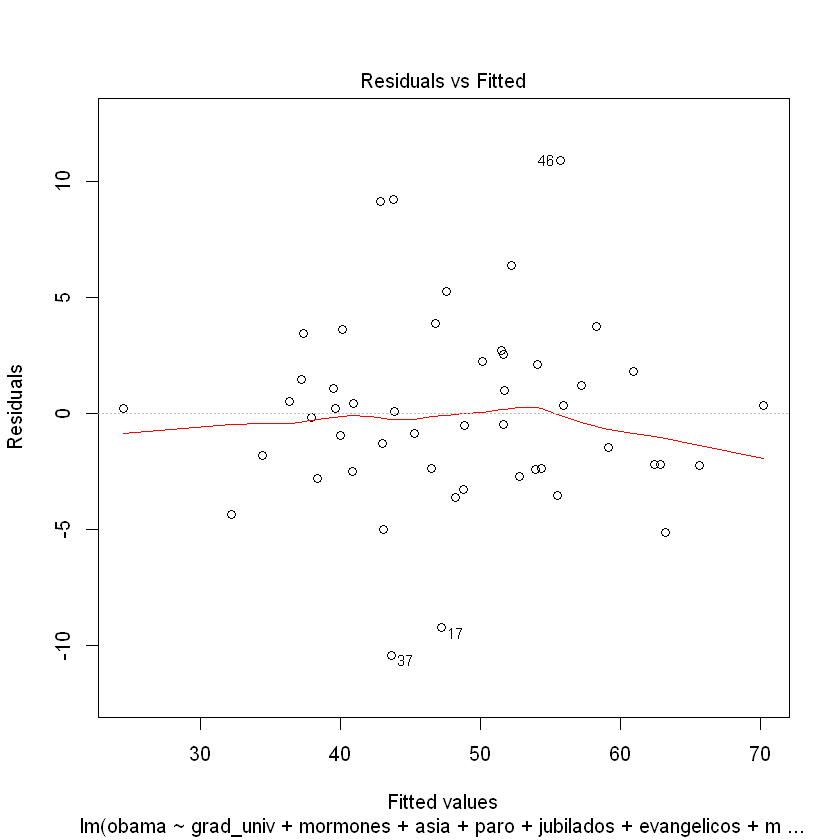

In [157]:
#Gráfico 1: Dignosis para ver si lños residups y los valroes ajustados están linealmente relacionados
plot(mod_best, which=1)

**Interpretación resultados.-** La **primera gráfica** nos ayuda a decidir **si las variables están linealmente relacionadas**. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una `evidencia POSITIVA` esta gráfica debe de verse SIN un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. Como se puede observar, a pesar de que los valores no están perfectamente agrupados, aun así no se encuentran muy separados y están contenidos en una región cercana por lo que no podemos afirmar con rotundidad si están linealmente relacionadas o no.

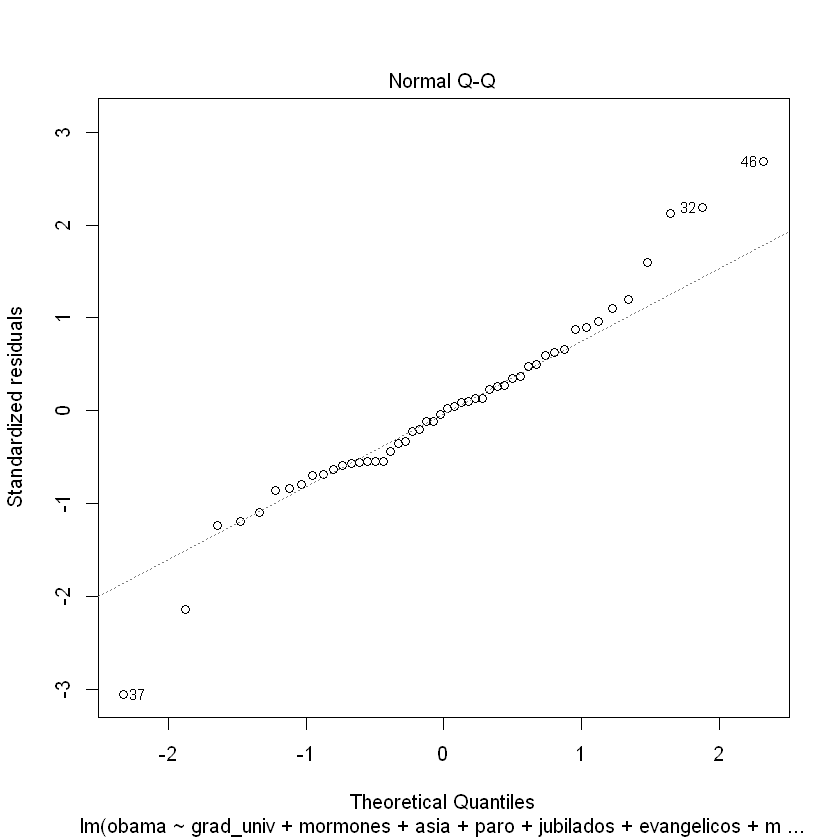

In [158]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_best, which=2)

**Interpretación resultados.-** La **segunda es la gráfica** de quantil-quantil sobre la **normalidad** de los residuos. Para que sea una `evidencia POSITIVA` en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole, sería una evidencia negativa de que los residuos no siguen una distribución normal. Se puede observar como los puntos siguen la diagonal de los residuos confirmando que están normalmente distribuidos.

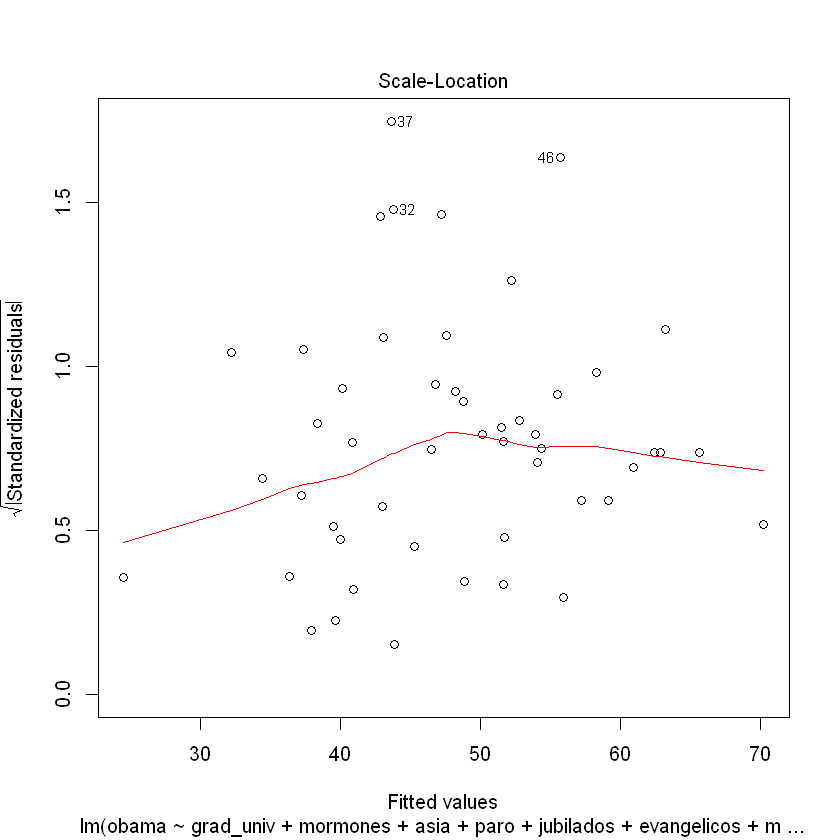

In [159]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_best, which=3)

**Interpretación resultados.-** La **tercera gráfica** es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la **homocedasticidad** de la varianza de los residuos. Para que sea una `evidencia POSITIVA` en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, sería una evidencia negativa. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. En esta situación, aunque la línea no es completamente horizontal, podemos asumir que los residuos presentan una homocedasticidad.

1            2            3            4            5            6 
4.957693e-03 1.305370e-01 8.940872e-03 3.012415e-04 7.178580e-03 1.437948e-02 
           7            8           10           11           12           13 
2.563171e-02 6.545863e-02 1.542839e-02 1.120886e-02 8.847656e-02 3.491773e-03 
          14           15           16           17           18           19 
1.439757e-03 5.432654e-06 4.069304e-02 4.144861e-02 1.882897e-05 1.375856e-03 
          20           21           22           23           24           25 
2.057618e-04 3.187013e-02 7.556884e-03 3.231287e-03 4.931225e-04 1.227905e-02 
          26           27           28           29           30           31 
3.070543e-04 2.851286e-03 1.890827e-02 2.213132e-02 4.835785e-03 9.236521e-03 
          32           33           34           35           36           37 
6.404012e-02 5.943542e-03 1.336899e-04 3.916009e-03 4.943658e-03 6.873271e-01 
          38           39           40           41           42           43 
8.396110e-03 9.150152e-03 9.054334e-03 3.638616e-03 3.395695e-05 7.654825e-04 
          44           45           46           47           48           49 
1.941372e-04 1.149475e-02 1.638268e-01 2.314867e-04 3.003045e-03 8.874179e-03 
          50           51 
7.949534e-03 3.077467e-02

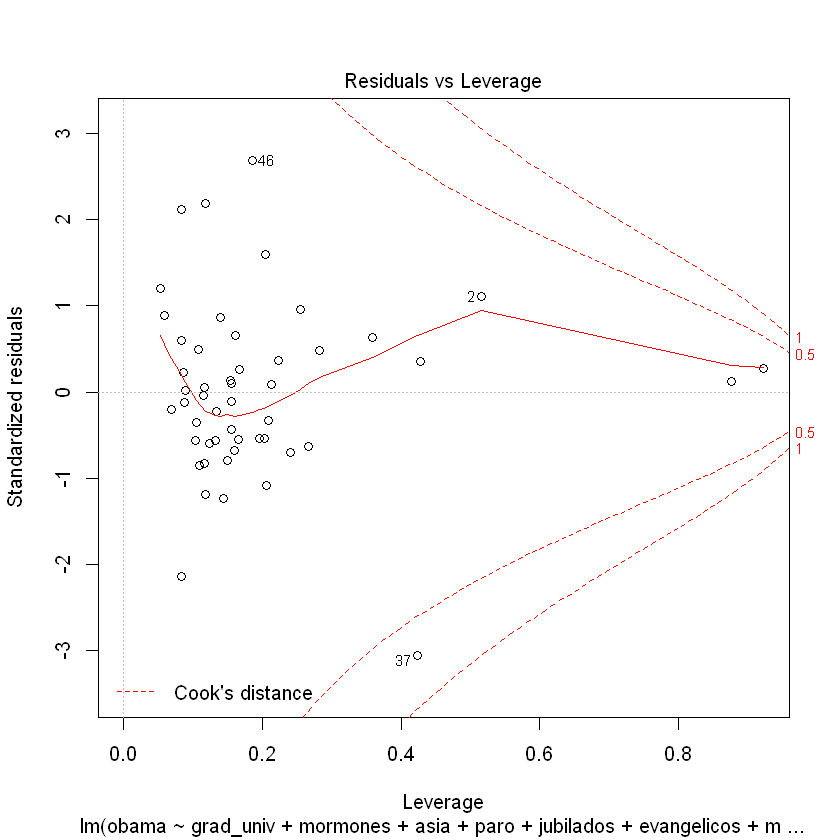

In [160]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_best, which=5)
cooks.distance(mod_best)

**Interpretación resultados.-** La **última gráfica** trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo:

* Las observaciones **influyentes** son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA` en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook. En este caso no se cumple pues todos los valores se encuentran por encima.


* Un punto **aberrante** es una observación que tiene un valor muy alto del residuo asociado. Para que sea una `evidencia POSITIVA` en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. Tampoco se cumple porque tenemos datos muy a la derecha y tenemos valores muy negativos.


* Una observación con alto **efecto palanca** "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA` en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha. No se cumple pues tenemos valores muy postivos y algunos muy a la derecha.

**Conclusión final diagnosis.-** En este caso, vemos que la **NO se cumple ninguna hipótesis**. Luego, NO podemos afirmar que el mejor modelo seleccionado sea BUENO para explicar la variable de porcentaje de votos por Obama `obama` en función de las variables seleccionadas.

# Bloque 2: Ejercicios intermedios de la prueba <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 04 Ejercicio

Utilizando el archivo de datos `hatco.csv` que contiene observaciones de clientes de la compañía de distribución industrial Hatco S.L. Realizar un modelo de regresión lineal múltiple de la variable `fidedila` que representa el porcentaje de compra de los clientes de la empresa Hatco S.L. en función de las siguientes variables explicativas: `velocida` que representa la velocidad de entrega, la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Responder a las siguientes cuestiones:

1. Ajustar el mejor modelo de regresión lineal múltiple posible con ese conjunto de variables 
2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido
3. Realizar una interpretación de los coeficientes del modelo de regresión lineal elegido
4. Realizar la descomposición de valores ajustados y residuos del modelo de regresión lineal elegido
5. Evaluar e interpretar la bondad de ajuste del modelo de regresión lineal elegido ($R^2$ y $R^2_{adj}$)
6. Evaluar e interpretar la prueba de significatividad individual del modelo de regresión lineal elegido
7. Evaluar e interpretar la prueba de significatividad global del modelo de regresión lineal elegido
8. Evaluar e interpretar la multicolinealidad (existencia de relación lineal entre las variables independientes) usando la matriz de correlaciones

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [161]:
hatco = read.csv2('hatco.csv')
head(hatco)

fidelida,precio,flexprec,imgfabri,imgfvent,calidadp
32,0.6,6.9,4.7,2.3,5.2
43,3,6.3,6.6,4,8.4
48,5.2,5.7,6,2.7,8.2
32,1,7.1,5.9,2.3,7.8
58,0.9,9.6,7.8,4.6,4.5
45,3.3,7.9,4.8,1.9,9.7


In [162]:
str(hatco)

'data.frame':	100 obs. of  6 variables:
 $ fidelida: Factor w/ 35 levels "25","28","29",..: 5 15 21 5 30 17 18 16 34 26 ...
 $ precio  : Factor w/ 45 levels "0.2","0.4","0.5",..: 4 28 44 8 7 31 22 39 14 33 ...
 $ flexprec: Factor w/ 47 levels "10","5","5.1",..: 18 13 7 20 45 28 44 12 43 15 ...
 $ imgfabri: Factor w/ 40 levels "2.5","2.9","3",..: 15 33 28 27 39 16 33 19 15 28 ...
 $ imgfvent: Factor w/ 29 levels "1.1","1.3","1.4",..: 11 26 15 11 29 8 28 10 18 20 ...
 $ calidadp: Factor w/ 46 levels "10","3.7","3.8",..: 11 35 33 30 5 45 28 23 28 37 ...


In [163]:
summary(hatco)

    fidelida      precio      flexprec     imgfabri     imgfvent     calidadp 
 49     : 7   1.3    : 5   9.9    : 5   4.5    :10   2.5    :13   8.4    : 8  
 54     : 6   2      : 5   6.4    : 4   4.8    : 8   2.6    : 8   6.8    : 6  
 36     : 5   0.9    : 4   6.7    : 4   4.7    : 6   2.3    : 7   5.2    : 5  
 39     : 5   1.4    : 4   7.6    : 4   4.6    : 4   2.7    : 7   8.2    : 5  
 43     : 5   1.6    : 4   8.7    : 4   4.9    : 4   2.1    : 5   6.7    : 4  
 (Other):71   (Other):77   (Other):78   (Other):67   (Other):59   (Other):71  
 NA's   : 1   NA's   : 1   NA's   : 1   NA's   : 1   NA's   : 1   NA's   : 1  

In [164]:
#Vemos con el summary que hay datos NA en hatco
wdata= na.omit(hatco)
any(is.na(wdata))

[1] FALSE

In [165]:
nfdata = data.frame(lapply(wdata, function(x) as.numeric(as.character(x)))) #Las variables eran factores asi que las pasamos a numericas
str(nfdata) #Comprobamos el cambio
summary(nfdata) #Mostramos el summary() del dataframe que usaremos

'data.frame':	99 obs. of  6 variables:
 $ fidelida: num  32 43 48 32 58 45 46 44 63 54 ...
 $ precio  : num  0.6 3 5.2 1 0.9 3.3 2.4 4.2 1.6 3.5 ...
 $ flexprec: num  6.9 6.3 5.7 7.1 9.6 7.9 9.5 6.2 9.4 6.5 ...
 $ imgfabri: num  4.7 6.6 6 5.9 7.8 4.8 6.6 5.1 4.7 6 ...
 $ imgfvent: num  2.3 4 2.7 2.3 4.6 1.9 4.5 2.2 3 3.2 ...
 $ calidadp: num  5.2 8.4 8.2 7.8 4.5 9.7 7.6 6.9 7.6 8.7 ...


    fidelida         precio        flexprec         imgfabri    
 Min.   :25.00   Min.   :0.20   Min.   : 5.000   Min.   :2.500  
 1st Qu.:39.00   1st Qu.:1.45   1st Qu.: 6.700   1st Qu.:4.550  
 Median :47.00   Median :2.20   Median : 8.000   Median :5.000  
 Mean   :46.24   Mean   :2.37   Mean   : 7.883   Mean   :5.251  
 3rd Qu.:53.50   3rd Qu.:3.25   3rd Qu.: 9.100   3rd Qu.:6.000  
 Max.   :65.00   Max.   :5.40   Max.   :10.000   Max.   :8.200  
    imgfvent        calidadp     
 Min.   :1.100   Min.   : 3.700  
 1st Qu.:2.200   1st Qu.: 5.800  
 Median :2.600   Median : 7.200  
 Mean   :2.662   Mean   : 6.981  
 3rd Qu.:3.000   3rd Qu.: 8.350  
 Max.   :4.600   Max.   :10.000  

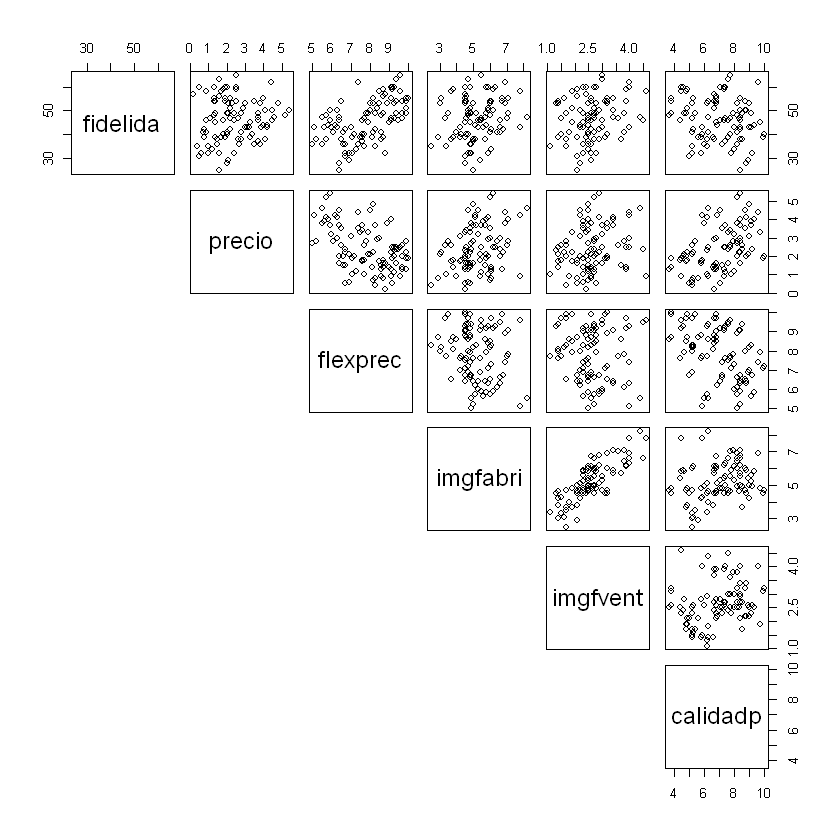

In [166]:
# Evidencia gráfica a través del gráfico de dispersión 
pairs(nfdata, lower.panel = NULL)

In [167]:
cor(nfdata)

,fidelida,precio,flexprec,imgfabri,imgfvent,calidadp
fidelida,1.00000000,0.07682487,0.57807750,0.2244257,0.26674626,-0.2040126
precio,0.07682487,1.00000000,-0.48550163,0.2715067,0.18873090,0.4682256
flexprec,0.57807750,-0.48550163,1.00000000,-0.1147211,-0.03801323,-0.4454256
imgfabri,0.22442574,0.27150666,-0.11472112,1.0000000,0.79015164,0.1990413
imgfvent,0.26674626,0.18873090,-0.03801323,0.7901516,1.00000000,0.1805295
calidadp,-0.20401261,0.46822563,-0.44542562,0.1990413,0.18052945,1.0000000


Utilizaremos un proceso automático pàra encontrar cual es la mejor combinación de variables para nuestro modelo.

In [168]:
#Estimamos el modelo con todas las variables
modc= lm(fidelida ~ ., data= nfdata)

In [169]:
#Hacemos una búsqueda automática del modelo óptimo hacia atrás
step(modc,direction="backward")

Start:  AIC=363.36
fidelida ~ precio + flexprec + imgfabri + imgfvent + calidadp

           Df Sum of Sq    RSS    AIC
- imgfabri  1     17.73 3461.1 361.87
<none>                  3443.4 363.36
- imgfvent  1     84.15 3527.5 363.75
- calidadp  1     84.44 3527.8 363.76
- precio    1   1028.68 4472.0 387.24
- flexprec  1   3111.18 6554.5 425.09

Step:  AIC=361.87
fidelida ~ precio + flexprec + imgfvent + calidadp

           Df Sum of Sq    RSS    AIC
<none>                  3461.1 361.87
- calidadp  1     85.33 3546.4 362.28
- imgfvent  1    396.35 3857.4 370.60
- precio    1   1096.41 4557.5 387.11
- flexprec  1   3095.96 6557.0 423.12



Call:
lm(formula = fidelida ~ precio + flexprec + imgfvent + calidadp, 
    data = nfdata)

Coefficients:
(Intercept)       precio     flexprec     imgfvent     calidadp  
    -2.2813       3.4031       4.8477       2.6733      -0.6981  


**Interpretación resultados.-** Al inicio del algoritmo, tenemos en `Start` el modelo inicial, entrado a la función `step`, y su valor de AIC. A continuación, en cada paso se disponen en una tabla las variables y el valor de AIC que obtendría el modelo si se eliminara la variable en cuestión. Las variables aparecen en la tabla ordenadas en orden ascendente del AIC que se obtiene al eliminarlas. El modelo que devuelve a eliminado la variable `imgfabri`, por lo que se usará el modelo que no tenga esa variable.

Ahora, realizaremos la función step pero con `direction="forward"` desde un modelo sin variables independientes (que se indica con ~1) y un rango que permita llegar al modelo completo con todas las variables (`modc`).

In [170]:
#Estimamos el modelo más sencillo (modelo cte)
mod_cte = lm(fidelida~1, data=nfdata)
summary(mod_cte)


Call:
lm(formula = fidelida ~ 1, data = nfdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.2384  -7.2384   0.7616   7.2616  18.7616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.2384     0.8982   51.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.937 on 98 degrees of freedom


In [171]:
#hacemos la búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=modc)) # con forward hay que poner el scope

Start:  AIC=434.65
fidelida ~ 1

           Df Sum of Sq    RSS    AIC
+ flexprec  1   2615.49 5211.3 396.38
+ imgfvent  1    556.90 7269.9 429.34
+ imgfabri  1    394.21 7432.5 431.53
+ calidadp  1    325.76 7501.0 432.44
<none>                  7826.8 434.65
+ precio    1     46.19 7780.6 436.06

Step:  AIC=396.38
fidelida ~ flexprec

           Df Sum of Sq    RSS    AIC
+ precio    1   1308.68 3902.6 369.75
+ imgfabri  1    670.43 4540.8 384.75
+ imgfvent  1    653.38 4557.9 385.12
<none>                  5211.3 396.38
+ calidadp  1     27.92 5183.3 397.85

Step:  AIC=369.75
fidelida ~ flexprec + precio

           Df Sum of Sq    RSS    AIC
+ imgfvent  1    356.16 3546.4 362.28
+ imgfabri  1    304.52 3598.1 363.71
<none>                  3902.6 369.75
+ calidadp  1     45.14 3857.4 370.60

Step:  AIC=362.28
fidelida ~ flexprec + precio + imgfvent

           Df Sum of Sq    RSS    AIC
+ calidadp  1    85.333 3461.1 361.87
<none>                  3546.4 362.28
+ imgfabri  1    18.


Call:
lm(formula = fidelida ~ flexprec + precio + imgfvent + calidadp, 
    data = nfdata)

Coefficients:
(Intercept)     flexprec       precio     imgfvent     calidadp  
    -2.2813       4.8477       3.4031       2.6733      -0.6981  


**Interpretación resultados.-** De esta forma, se ha eliminado nuevamente la varibale `imgfabri`, quedandonos en ambos casos un modelo de 4 variables. Eso quiere decir, que el modelo encontrado por ambas vías es óptimo. Por lo tanto el modelo que mejor se ajusta el conjunto es:

\begin{align*}
fidelida_{i}&=\hat \beta_{0}+\hat\beta_{1}flexprec_{i}+\hat\beta_{2}precio_{i}+\hat\beta_{3}imgfvent_{i}+\hat\beta_{4}calidadp_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Ahora, compararemos el modelo obtenido previamente con el modelo escogiendo todos los datos.

In [172]:
#Modelo optimizado
modelof= lm(fidelida ~ flexprec + precio + imgfvent + calidadp, data = nfdata)
output=summary(modelof)
output


Call:
lm(formula = fidelida ~ flexprec + precio + imgfvent + calidadp, 
    data = nfdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2595  -3.6475  -0.5532   2.9286  14.2025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2813     6.3063  -0.362  0.71835    
flexprec      4.8477     0.5287   9.170 1.07e-14 ***
precio        3.4031     0.6236   5.457 3.92e-07 ***
imgfvent      2.6733     0.8148   3.281  0.00145 ** 
calidadp     -0.6981     0.4586  -1.522  0.13128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.068 on 94 degrees of freedom
Multiple R-squared:  0.5578,	Adjusted R-squared:  0.539 
F-statistic: 29.64 on 4 and 94 DF,  p-value: 6.018e-16


In [173]:
# Obtenemos las métricas para cada uno de los modelos
R2  = c(summary(modc)$r.squared, summary(modelof)$r.squared)
AIC = c(extractAIC(modc)[2],extractAIC(modelof)[2])
BIC = c(extractAIC(modc,k=log(nrow(nfdata)))[2],extractAIC(modelof,k=log(nrow(nfdata)))[2])

In [174]:
require(knitr)

Loading required package: knitr


In [175]:
Medidas = data.frame(R2,AIC,BIC,row.names=c("modeloC","modelof"))
names(Medidas)=c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|        | Coef.R2adj|      AIC|      BIC|
|:-------|----------:|--------:|--------:|
|modeloC |  0.5600529| 363.3592| 378.9299|
|modelof |  0.5577879| 361.8675| 374.8431|

**Interpretación resultados.-** Como podemos apreciar en la tabla superior, ambos modelos presenta un $R^2_{adj}$ muy similar, siendo el del **modeloC** (el que engloba todas las variables el de mayor valor. Sin embargo, el modelo optimizado **modelof** posee im AIC y BIC menores. Por lo tanto, el modelo optimizado que obtuvimos es levemente mejor ya que el valor de AIC penaliza la complejidad del modelo y el error residual y por tanto, a menor valor mejor es el modelo.

In [176]:
str(modelof)

List of 12
 $ coefficients : Named num [1:5] -2.281 4.848 3.403 2.673 -0.698
  ..- attr(*, "names")= chr [1:5] "(Intercept)" "flexprec" "precio" "imgfvent" ...
 $ residuals    : Named num [1:99] -3.728 -0.298 3.46 -4.244 1.525 ...
  ..- attr(*, "names")= chr [1:99] "1" "2" "3" "4" ...
 $ effects      : Named num [1:99] -460.07 51.14 -36.18 18.87 -9.24 ...
  ..- attr(*, "names")= chr [1:99] "(Intercept)" "flexprec" "precio" "imgfvent" ...
 $ rank         : int 5
 $ fitted.values: Named num [1:99] 35.7 43.3 44.5 36.2 56.5 ...
  ..- attr(*, "names")= chr [1:99] "1" "2" "3" "4" ...
 $ assign       : int [1:5] 0 1 2 3 4
 $ qr           :List of 5
  ..$ qr   : num [1:99, 1:5] -9.95 0.101 0.101 0.101 0.101 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:99] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:5] "(Intercept)" "flexprec" "precio" "imgfvent" ...
  .. ..- attr(*, "assign")= int [1:5] 0 1 2 3 4
  ..$ qraux: num [1:5] 1.1 1.11 1.2 1.03 1.1
  ..$ pivot: int [1:5] 1 2 3 4 5
  ..

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [177]:
#Mostramos los coeficientes de la pendiente para cada variable
modelof$coefficients

(Intercept)    flexprec      precio    imgfvent    calidadp 
 -2.2813030   4.8476679   3.4030784   2.6733471  -0.6981047

**Interpretación de los resultados.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -2.28130304517632$, $\beta_1 = 4.84766787308817$, $\beta_2 = 3.4030784058124$, $\beta_3 = 2.67334713234811$ y $\beta_4 = -0.698104717208616$. En este modelo la variable dependiente `fidelida` representa porcentaje de compra de los clientes de productos de la empresa Hatco S.L y las varibles independientes son la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Para este caso $\beta_0 = -2.28130304517632$ representa el valor de intersección con el eje, lo que implica el pocentaje fidelidad inicial de los clientes a seguir comprando productos de la empresa cuando las demás variables son cero. Al ser un porcentaje negativo, es complicado interpretar su significado. Una posible interpretación sería que, sin la apotación de las demás variables, no existe una tendencia en los clientes a comprar porductos de la empresa Hatco S.L.

Luego, $\beta_1 = 4.84766787308817$ es el coeficiente de la pendiente de la varibale `flexprec` y muestra como cambian el porcentaje de compra por parte de los clientes en función de la flexibilidad de los precios. Específicamente, indica que por cada unidad de valor que aumente la flexibilidad de los precios, el porcentaje de compra aumenta entorno al $485$%. Que el coeficiente sea positivo indica una relación proporcional directa donde a mayor flexibilidad más clientes compran productos a la empresa. Por otro lado, $\beta_2 = 3.4030784058124$ es el coeficiente de la pendiente que relaciona el porcentaje de compra de los clientes con el nivel del precio de los productos que vende la empresa, definido en la variable `precio`. El valor de este coeficiente nos indica que por cada aumento en el nivel de los precios, el porcentaje de compra de clientes aumenta un $340$%. Debido a que el valor del coeficiente es positivo, podemos atribuir a ambas variables una relación lineal directa y proporcional donde a mayor nivel del precio un mayor porcentaje de clientes compra en Hatco S.L. Con respecto a $\beta_3 = 2.67334713234811$ es el coeficiente de la pendiente de la variable `imgfvent` y muestra como cambia el porcentaje de clientes de la empresa en función de la fuerza de la imagen de los productos. Concretamente, podemos atribuirle a este caso que por cada aumento de una unidad de esta variable, aumentará un $267$% el porcentaje de clientes. Que el signo del coeficiente sea positivo aclara que la relación existente entre ambas variables es directamente proporcional por lo que a mayor fuerza de la imagen mayor número de clientes comprarán en la empresa. Por último, $\beta_4 = -0.698104717208616$ es el coeficiente de la pendiente de la variable `calidadp` y muestra como cambia el porcentaje de clientes en función de la calidad de los productos. En este caso, nos indica que por cada aumento de una unidad de la calidad de los productos, la cantidad de clientes se reducirán un $70$%. Como el valor del coeficiente de la pendiente es negativo, podemos constatar que la relación entre las varibales `calidadp` y `fidelida` es inversamente proporcional y, por tanto, que a cuanto mayor calidad de los productos, menor será el número de clientes de la empresa Hatco S.L.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [178]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelof)
head(yhat)

1        2        3        4        5        6 
35.72801 43.29755 44.53999 36.24370 56.47500 45.55318

In [179]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modelof)
head(uhat)

1          2          3          4          5          6 
-3.7280062 -0.2975487  3.4600099 -4.2436989  1.5249953 -0.5531757

In [180]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(nfdata$fidelida,yhat, uhat))

,,yhat,uhat
1,32,35.72801,-3.7280062
2,43,43.29755,-0.2975487
3,48,44.53999,3.4600099
4,32,36.24370,-4.2436989
5,58,56.47500,1.5249953
6,45,45.55318,-0.5531757


In [181]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
35.72801-3.7280062

[1] 32

**Interpretación de los resultados.-** Comprobamos que efectivamente los resultados obtenidos de los residuos y los valores ajustados son correctos.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [182]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
ssr=head(output$sigma)
ssr

[1] 6.067953

In [183]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2 = output$r.squared
R2

[1] 0.5577879

In [184]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj = output$adj.r.squared
R2adj

[1] 0.5389704

**Interpretación de los resultados.-** El valor de $R^2$ oscila entre 0 y 1. Un valor próximo a 0 indica que el modelo no se ajusta bien a los datos mientras que cercano a 1 si se ajusta bien. En nuestro caso, el valor de $R^2 =0.5578$. Esto indica que nuestro modelo no es capaz de explicar perfectamente la fidelidad de los clientes de la empresa teniendo en cuenta esas variables. Además, el valor de $R^2_{adj}=0.5390$ es muy próximo al de $R^2$ por lo que, a pesar que nuestro modelo no se ajusta perfectamente, las variables usadas sí aportan al modelo.  

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

In [185]:
# Obtenemos los p-valores de la prueba de significatividad individual 
summary(modelof)


Call:
lm(formula = fidelida ~ flexprec + precio + imgfvent + calidadp, 
    data = nfdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2595  -3.6475  -0.5532   2.9286  14.2025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2813     6.3063  -0.362  0.71835    
flexprec      4.8477     0.5287   9.170 1.07e-14 ***
precio        3.4031     0.6236   5.457 3.92e-07 ***
imgfvent      2.6733     0.8148   3.281  0.00145 ** 
calidadp     -0.6981     0.4586  -1.522  0.13128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.068 on 94 degrees of freedom
Multiple R-squared:  0.5578,	Adjusted R-squared:  0.539 
F-statistic: 29.64 on 4 and 94 DF,  p-value: 6.018e-16


**Interpretación de los resultados.-** Los p-valores de las variables usadas son los siguientes:
+ `flexprec`-> $p-valor=1.07e^{-14}$
+ `precio`-> $p-valor=3.92e^{-7}$
+ `imgvent`-> $p-valor=0.00145$
+ `calidadp`-> $p-valor=0.13128$

Como podemos ver todas las variables presentan p-valores muy por debajo de $\alpha=0.05$ a excepción de la variable `calidadp` la cual se encuentra por encima. Como hemos visto anteriormente, esto indica que mientras las otras variables son ampliamente significativas para el modelo, la variable `calidadp` podría no serlo.

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

In [189]:
# Obtenemos el p-valor de la prueba de significatividad conjunta (F-statistic + p-value)
summary(modelof)


Call:
lm(formula = fidelida ~ flexprec + precio + imgfvent + calidadp, 
    data = nfdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2595  -3.6475  -0.5532   2.9286  14.2025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2813     6.3063  -0.362  0.71835    
flexprec      4.8477     0.5287   9.170 1.07e-14 ***
precio        3.4031     0.6236   5.457 3.92e-07 ***
imgfvent      2.6733     0.8148   3.281  0.00145 ** 
calidadp     -0.6981     0.4586  -1.522  0.13128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.068 on 94 degrees of freedom
Multiple R-squared:  0.5578,	Adjusted R-squared:  0.539 
F-statistic: 29.64 on 4 and 94 DF,  p-value: 6.018e-16


**Interpretación de los resultados.-** Ahora analizaremos el p-valor obtenido por el estadístico-F el cual tiene en cuenta todas las variables. El valor del $p-valor=6.018e^{-16}$ nos indica que el modelo es significativo al ser menor del $\alfa=0.05$. Sin embargo, no nos garantiza que alguna de las variables pueda no ser significativa para el modelo de forma individual, como es el caso de `calidadp`.

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

In [137]:
# Seleccionamos las variables que nos interesan
xdata = nfdata[, c("flexprec", "precio", 'imgfvent', 'calidadp')]

In [138]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,flexprec,precio,imgfvent,calidadp
flexprec,1.00000000,-0.4855016,-0.03801323,-0.4454256
precio,-0.48550163,1.0000000,0.18873090,0.4682256
imgfvent,-0.03801323,0.1887309,1.00000000,0.1805295
calidadp,-0.44542562,0.4682256,0.18052945,1.0000000


In [139]:
cor.test(xdata$flexprec, xdata$precio)


	Pearson's product-moment correlation

data:  xdata$flexprec and xdata$precio
t = -5.4695, df = 97, p-value = 3.515e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6231851 -0.3186283
sample estimates:
       cor 
-0.4855016 


In [140]:
cor.test(xdata$flexprec, xdata$imgfvent)


	Pearson's product-moment correlation

data:  xdata$flexprec and xdata$imgfvent
t = -0.37466, df = 97, p-value = 0.7087
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2336715  0.1606038
sample estimates:
        cor 
-0.03801323 


In [141]:
cor.test(xdata$flexprec, xdata$calidadp)


	Pearson's product-moment correlation

data:  xdata$flexprec and xdata$calidadp
t = -4.8999, df = 97, p-value = 3.84e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5908800 -0.2719248
sample estimates:
       cor 
-0.4454256 


In [142]:
cor.test(xdata$precio, xdata$imgfvent)


	Pearson's product-moment correlation

data:  xdata$precio and xdata$imgfvent
t = 1.8928, df = 97, p-value = 0.06137
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.00901687  0.37227270
sample estimates:
      cor 
0.1887309 


In [143]:
cor.test(xdata$precio, xdata$calidadp)


	Pearson's product-moment correlation

data:  xdata$precio and xdata$calidadp
t = 5.2189, df = 97, p-value = 1.023e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2983955 0.6093163
sample estimates:
      cor 
0.4682256 


In [144]:
cor.test(xdata$imgfvent, xdata$calidadp)


	Pearson's product-moment correlation

data:  xdata$imgfvent and xdata$calidadp
t = 1.8077, df = 97, p-value = 0.07375
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01750627  0.36493547
sample estimates:
      cor 
0.1805295 


**Interpretación de resultados.-** En este último apartado hemos anlizado la correlación existente entre las variables independientes donde solo existirá una relación en aquellas que posean un $p-valor<\alpha=0.05$. Aquellas que cumplen esta condición son las variables `precio`y `flexprec` con un $p-valor=3.515e^{-07}$ y un coeficiente de correlación $cor=-0.4855016 $ que nos indica una relación inversamente proporcional entre las dos variables. También la variable `flexprec` y `calidadp` con un $p-valor=3.84e^{-06}$ y un coeficiente de correlación $cor=-0.4454256$ que nuevamente nos indica una relación inversa y proporcional entre ambas variables. Y por último, se cumple nuevamente para `precio` y `calidadp` con un $p-valor=1.023e^{-06}$ y un coeficiente de correlación $cor=0.4682256$ siendo esta vez positivo, es indicativo de relación lineal y directa entre las variables.

### 05 Ejercicio 

En este ejercicio deberéis de <u>crear vuestra propia función de R</u> con el objetivo de automatizar el proceso de ajuste de un modelo de regresión lineal múltiple a un conjunto de datos de sección cruzada dado. Es decir, tenéis que replicar la función **`lm()`** de la librería $\tt stats$. Una vez creada, comparar los resultados obtenidos con la propia función **`lm()`** utilizando alguna de las bases de datos propias de las librerías de R teniendo en cuenta los principales objetos de la salida de los modelos: output de la regresión, coeficientes de regresión estimados, residuos estimados, grados de libertad, etc.

Para aplicar a un ejemplo la función que diseñéis podéis utilizar cualquier base de datos disponible en las precargadas de R.

In [145]:
# Bases de datos precargadas en R
data(package = .packages(all.available = TRUE))

Warning message in data(package = .packages(all.available = TRUE)):
"datasets have been moved from package 'base' to package 'datasets'"Warning message in data(package = .packages(all.available = TRUE)):
"datasets have been moved from package 'stats' to package 'datasets'"

Package,Item,Title
datasets,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
datasets,BJsales,Sales Data with Leading Indicator
datasets,BJsales.lead (BJsales),Sales Data with Leading Indicator
datasets,BOD,Biochemical Oxygen Demand
datasets,CO2,Carbon Dioxide Uptake in Grass Plants
datasets,ChickWeight,Weight versus age of chicks on different diets
datasets,DNase,Elisa assay of DNase
datasets,EuStockMarkets,"Daily Closing Prices of Major European Stock Indices, 1991-1998"
datasets,Formaldehyde,Determination of Formaldehyde
datasets,HairEyeColor,Hair and Eye Color of Statistics Students


<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [146]:
#Creamos una función para ajustar un modelo de regresión lineal multiple
lm_propio = function(formula, data){
    #Extraemos los términos de la fórmula
    mf = model.frame(formula, data) #Construimos un DF que incluya las variables
    X = model.matrix(attr(mf, 'terms'), data) #Convierte las variables en una matriz y añade una columna para el intercept (beta_0)
    Y = model.response(mf) #Devuelve la variable dependiente del DF

    #Calculamos de los coeficientes de la pendiente: (X'X)^(-1) * X'Y
    beta = solve(t(X) %*% X) %*% t(X) %*% Y #Fórmula de mínimos cuadrados que calcula los coeficientes beta utlizando la función solve()
    #La función t() calcula la traspuesta de una matriz y %*% realiza la multiplicación matricial
    
    #Cálculamos de los valores ajustados y residuos
    valores_ajustados = X %*% beta
    residuos = Y - valores_ajustados

    #Obtenemos los grados de libertad
    f = nrow(X) #Número de filas(observaciones)
    c = ncol(X) #Número de columnas (los coeficeintes)
    gl = f - c #Grados de libertad

    #Calculamos la varianza residual
    sigma2 = sum(residuos^2) / gl #La variable sum() realiza en sumatorio
    
    #Calculamos la matriz de covarianza de los coeficientes
    matriz_covarianza = sigma2 * solve(t(X) %*% X) 
  
    #Hayamos el error estándar de los coeficientes
    es_beta = sqrt(diag(matriz_covarianza)) #Extreamos los elementos diagonales que son las varianzas de cada coeficiente y calcula su raiz cuadrada
    #La función sqrt() hace la raiz cuadrada y la función diag() devuelve la diagonal de una matriz
    
    #Creamos los estadísticos t
    t_valores = beta / es_beta 
  
    #Y los p-valores asociados a los coeficientes
    p_valores = 2 * pt(-abs(t_valores), gl)
    #Usamos pt() para realizar la función de distribución y la función abs() para le valor absoluto
    
    #Obtenemos R^2 y R^2 ajustado
    ss_total = sum((Y - mean(Y))^2)  # Suma de cuadrados total
    ss_residuos = sum(residuos^2)  # Suma de cuadrados residual
    r_2 = 1 - (ss_residuos / ss_total)
    r_2_adj = 1 - ((1 - r_2) * (f - 1) / gl)
  
    #Por último, obtenemos los residuos estandarizados
    residuos_std = residuos / sqrt(sigma2)
  
    #Salida de los resultados obtenidos
    list(
        coefficients = as.vector(beta),         # Coeficientes estimados
        residuals = residuos,                   # Residuos
        fitted.values = valores_ajustados,      # Valores ajustados
        df.residual = gl,                       # Grados de libertad residuales
        sigma2 = sigma2,                        # Varianza residual
        covariance = matriz_covarianza,         # Matriz de covarianza
        se = es_beta,                           # Error estándar
        t_values = t_valores,                   # Estadísticos t
        p_values = p_valores,                   # p-valores
        r_squared = r_2,                        # R^2
        r_squared_adj = r_2_adj,                # R^2 ajustado
        residuals_standardized = residuos_std   # Residuos estandarizados
    )
}

Se nos pide que creemos una función que realice el mismo procedimiento que la función `lm()`. Esta función que crearemos recibe el nombre de **`lm_propio`** necesita de dos parámetros:
+ `formula`-> Este parámetro indica la fórmula con las variables a usar en el modelo de regresión.
+ `data` -> Este parámetro indica el dataframe que contiene las variables y los datos que se quieren utilizar.

Lo que realiza la función **`lm_propio`** en primera instancia es contruir un marco de datos o dataframe donde se incluyan las variables. También crea una matriz con las variables teniendo en cuenta la posibilidad de un valor distinto de cero para $\beta _0$.

Luego, realiza el ajuste de mínimos cuadrados para obtener los distintos coeficientes de la pendiente para cada variable, recogidos en la variable de la función `beta`. A partir de aquí se utiliza los valores de los coeficientes $\beta_i$ calculados para hallar:
+ *Los valores ajustado*. Operando la matriz por los coeficientes.
+ *los residuos*. Utilizando los valores ajustados calculados previamente.
+ *Los grados de libertad*. Utilizando las filas y las columnas de la matriz de coeficientes.
+ *La varianza residual*. Haciendo uso de los residuos y los grados de libertad obtenidos.
+ *La matriz de covarianza*. Aprovechando los resultados de la varianza residual.
+ *El error estándar de los coeficientes*. Haciendo la raiz cuadrada a la diagonal de la matriz de covarianza.
+ *Los estadísticos t*. Por medio de los coeficientes y sus errores estándar.
+ *Los p-valores*. Utilizando los estadísticos t obtenidos previamente.
+ *$R^2$ y $R^2$ ajustado*. Obteniendo para ello, previamente, la suma de cuadrados total y residual.
+ *Los residuos estandarizados*. Por medio de los residuos y la varianza residual

Una vez finalizada la función, utiliamos el dataset de `USArrests`, el cual contiene estadísticas de arrestos de varios crímenes en los 50 estados de Estados Unidos en el año 1973, para comprobar si la función realiza el cálculo correctamente. Primero observemos brevemente este dataset.

In [147]:
data('USArrests')
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [148]:
cat('Un resumen general de los datos:\n\n')
summary(USArrests)

Un resumen general de los datos:



     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [149]:
cat('Observamos la estructura de las variables:\n\n')
str(USArrests)

Observamos la estructura de las variables:

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


Podemos obsevar que se trata de un dataset de 4 variables (`Murder`, `Assault`, `UrbanPop` y `Rape`) y 50 observaciones (1 por estado). El modelo que realizaremos estará representado por la función:

\begin{align*}
UrbanPop_{i}&=\beta_{0}+\beta_{1}*Murder_{i}+\beta_{2}*Assault_{i}+\beta_{3}*Rape_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Donde el porcentaje de la población urbana (`UrbanPop`) sera la variable dependiente y las variables independientes serán los números de arrestos por asesinato (`Murder`), asalto (`Assault`) y violación (`Rape`) por cada $100000$ habitantes de cada estado.

In [150]:
formula = UrbanPop ~ Murder + Assault + Rape           #La fórmula que usaremos en ambos modelos
modelo_propio = lm_propio(formula, data= USArrests)    #Modelo usando la función creada
modelo = lm(formula, data= USArrests)                  #Modelo usando la funcion predefinida lm()

In [151]:
summary(modelo)           #Mostramos los resúmenes de cada modelo
summary(modelo_propio)


Call:
lm(formula = formula, data = USArrests)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.456  -6.950   0.077   7.770  25.221 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.84187    4.82483  10.952 2.09e-14 ***
Murder      -1.41154    0.71954  -1.962   0.0559 .  
Assault      0.05190    0.04161   1.247   0.2186    
Rape         0.69841    0.26776   2.608   0.0122 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.08 on 46 degrees of freedom
Multiple R-squared:  0.2337,	Adjusted R-squared:  0.1837 
F-statistic: 4.676 on 3 and 46 DF,  p-value: 0.006208


                       Length Class  Mode   
coefficients            4     -none- numeric
residuals              50     -none- numeric
fitted.values          50     -none- numeric
df.residual             1     -none- numeric
sigma2                  1     -none- numeric
covariance             16     -none- numeric
se                      4     -none- numeric
t_values                4     -none- numeric
p_values                4     -none- numeric
r_squared               1     -none- numeric
r_squared_adj           1     -none- numeric
residuals_standardized 50     -none- numeric

A continuación, comparamos los resultados obtenidos usando la función creada con los que realiza la función `lm()` con la intención de verificar si la función `lm_propio()` es útil.

In [152]:
cat("Coeficientes:\n\n") #Usamos cat() para que no salga [1] al ejecutarlo (pero hay que indicar los finales y comienzo de lines)
print("lm propio:")
print(modelo_propio$coefficients)
print("lm:")
print(coef(modelo))

cat("\n\nErrores estándar:\n\n")
print("lm propio:")
print(modelo_propio$se)
print("lm:")
print(summary(modelo)$coefficients[, "Std. Error"])

cat("\n\nR^2 y R^2 ajustado:\n\n")
print("lm propio:")
print(c(modelo_propio$r_squared, modelo_propio$r_squared_adj))
print("lm:")
print(c(summary(modelo)$r.squared, summary(modelo)$adj.r.squared))

cat("\n\np-valores:\n\n")
print("lm propio:")
print(modelo_propio$p_values)
print("lm:")
print(summary(modelo)$coefficients[, "Pr(>|t|)"])

Coeficientes:

[1] "lm propio:"
[1] 52.84186722 -1.41153751  0.05190045  0.69841115
[1] "lm:"
(Intercept)      Murder     Assault        Rape 
52.84186722 -1.41153751  0.05190045  0.69841115 


Errores estándar:

[1] "lm propio:"
(Intercept)      Murder     Assault        Rape 
 4.82482972  0.71953549  0.04160621  0.26776159 
[1] "lm:"
(Intercept)      Murder     Assault        Rape 
 4.82482972  0.71953549  0.04160621  0.26776159 


R^2 y R^2 ajustado:

[1] "lm propio:"
[1] 0.2337021 0.1837261
[1] "lm:"
[1] 0.2337021 0.1837261


p-valores:

[1] "lm propio:"
                    [,1]
(Intercept) 2.086265e-14
Murder      5.586128e-02
Assault     2.185567e-01
Rape        1.223030e-02
[1] "lm:"
 (Intercept)       Murder      Assault         Rape 
2.086265e-14 5.586128e-02 2.185567e-01 1.223030e-02 


Como se puede observar, los resultados obtenidos usando la función `lm_propio()` son identicos a los que se obtendrían realizando el modelo de regresión lineal múltiple `lm()`ofrecido por la libreria $\tt stats$.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 06</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>